In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dask as dk
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score  
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv('C:\\Users\\TITILAYO\\Downloads\\Donor raw data.csv')

# Get the original feature names
originalFeatures = data.columns

# Print the count of original features and their names
print('Original features count:', len(originalFeatures))
print('Original features:', originalFeatures)

# Display the first few rows of the data
print(data.head())


Original features count: 50
Original features: Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE',
       'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:\\Users\\TITILAYO\\Downloads\\Donor raw data.csv')

# Define the columns to drop
drops = [
    'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3',
    'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK', 
    'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP',  
    'LIFETIME_CARD_PROM', 'LIFETIME_PROM', 'LIFETIME_GIFT_COUNT',
    'LIFETIME_AVG_GIFT_AMT', 'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT',
    'TARGET_D',
    'FILE_AVG_GIFT', 'FILE_CARD_GIFT',
    'MEDIAN_HOME_VALUE',
    'PER_CAPITA_INCOME', 'SES', 'CLUSTER_CODE'
]

# Drop the specified columns
data.drop(columns=drops, inplace=True)

# Print the remaining columns
remaining_features = data.columns
print('Remaining features count:', len(remaining_features))
print('Remaining features:', list(remaining_features))


Remaining features count: 30
Remaining features: ['TARGET_B', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT']


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:\\Users\\TITILAYO\\Downloads\\Donor raw data.csv')

# Define the columns to keep
relevant_columns = [
    'TARGET_B', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE', 
    'URBANICITY', 'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 
    'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOUSEHOLD_INCOME', 
    'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_AVG_GIFT_AMT', 
    'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT',
    'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 
    'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
    'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT'
]

# Create a new DataFrame with only the relevant columns
data_subset = data[relevant_columns]

# Save the new DataFrame to a CSV file
output_file_path = 'C:\\Users\\TITILAYO\\Downloads\\Donor raw data.csv'
data_subset.to_csv(output_file_path, index=False)

print('The selected columns have been saved to', output_file_path)


The selected columns have been saved to C:\Users\TITILAYO\Downloads\Donor raw data.csv


In [4]:
output_file_path = 'C:\\Users\\TITILAYO\\Downloads\\Donor raw data.csv'
data_subset.to_csv(output_file_path, index=False)

In [5]:
import pandas as pd

# Read the saved CSV file
output_file_path = 'C:\\Users\\TITILAYO\\Downloads\\Donor raw data.csv'
saved_data = pd.read_csv(output_file_path)

# Check for null values in each column
null_values = saved_data.isnull().sum()

# Print the number of null values in each column
print(null_values)


TARGET_B                          0
CONTROL_NUMBER                    0
MONTHS_SINCE_ORIGIN               0
DONOR_AGE                      4795
IN_HOUSE                          0
URBANICITY                        0
HOME_OWNER                        0
DONOR_GENDER                      0
INCOME_GROUP                   4392
PUBLISHED_PHONE                   0
OVERLAY_SOURCE                    0
MOR_HIT_RATE                      0
WEALTH_RATING                  8810
MEDIAN_HOUSEHOLD_INCOME           0
PCT_OWNER_OCCUPIED                0
PCT_ATTRIBUTE4                    0
PEP_STAR                          0
RECENT_AVG_GIFT_AMT               0
RECENT_CARD_RESPONSE_PROP         0
RECENT_AVG_CARD_GIFT_AMT          0
RECENT_RESPONSE_COUNT             0
RECENT_CARD_RESPONSE_COUNT        0
MONTHS_SINCE_LAST_PROM_RESP     246
LIFETIME_GIFT_AMOUNT              0
LIFETIME_MIN_GIFT_AMT             0
LAST_GIFT_AMT                     0
CARD_PROM_12                      0
NUMBER_PROM_12              

In [6]:
# Read the saved CSV file
saved_data = pd.read_csv(output_file_path)
saved_data

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,...,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
0,0,5,101,87.0,0,?,H,M,2.0,0,...,1,0,26.0,297.0,5.0,15.0,5,12,26,92
1,1,12,137,79.0,0,R,H,M,7.0,0,...,4,2,11.0,368.0,5.0,17.0,7,21,7,122
2,0,37,113,75.0,0,S,H,F,5.0,0,...,9,6,14.0,603.0,5.0,19.0,11,32,6,105
3,0,38,92,NaN,0,U,H,F,6.0,1,...,9,4,11.0,435.0,3.0,15.0,11,33,6,92
4,0,41,101,74.0,0,R,U,F,2.0,1,...,2,1,18.0,106.0,5.0,25.0,6,19,18,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,0,191687,89,66.0,1,U,H,F,4.0,1,...,2,1,18.0,103.0,3.0,15.0,6,13,18,81
19368,0,191710,137,77.0,1,C,H,F,5.0,1,...,4,2,21.0,164.0,1.0,10.0,6,13,21,130
19369,0,191746,29,NaN,1,S,U,M,1.0,1,...,0,0,NaN,15.0,15.0,15.0,3,9,23,23
19370,0,191775,129,78.0,1,?,U,M,6.0,1,...,1,0,23.0,440.0,5.0,25.0,7,24,8,129


In [7]:
saved_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     19372 non-null  int64  
 1   CONTROL_NUMBER               19372 non-null  int64  
 2   MONTHS_SINCE_ORIGIN          19372 non-null  int64  
 3   DONOR_AGE                    14577 non-null  float64
 4   IN_HOUSE                     19372 non-null  int64  
 5   URBANICITY                   19372 non-null  object 
 6   HOME_OWNER                   19372 non-null  object 
 7   DONOR_GENDER                 19372 non-null  object 
 8   INCOME_GROUP                 14980 non-null  float64
 9   PUBLISHED_PHONE              19372 non-null  int64  
 10  OVERLAY_SOURCE               19372 non-null  object 
 11  MOR_HIT_RATE                 19372 non-null  int64  
 12  WEALTH_RATING                10562 non-null  float64
 13  MEDIAN_HOUSEHOLD

In [8]:
#Display summary statistics
saved_data.describe()

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOUSEHOLD_INCOME,...,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
count,19372.000000,19372.000000,19372.000000,14577.000000,19372.000000,14980.000000,19372.000000,19372.000000,10562.000000,19372.000000,...,19372.000000,19372.000000,19126.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,96546.225377,73.409973,58.919051,0.073198,3.907543,0.497729,3.361656,5.005397,341.970215,...,3.043103,1.730539,19.038900,104.425716,7.620932,16.584199,5.367128,12.901869,18.191152,69.482088
std,0.433024,55830.643871,41.255574,16.669382,0.260469,1.864796,0.500008,9.503481,2.815386,164.207807,...,2.046401,1.535521,3.415559,105.722460,7.959786,11.977558,1.264205,4.642072,4.033065,37.568169
min,0.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-12.000000,15.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000
25%,0.000000,48289.000000,29.000000,47.000000,0.000000,2.000000,0.000000,0.000000,3.000000,232.000000,...,2.000000,1.000000,17.000000,42.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000
50%,0.000000,96937.000000,65.000000,60.000000,0.000000,4.000000,0.000000,0.000000,5.000000,311.000000,...,3.000000,1.000000,18.000000,79.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000
75%,0.250000,145429.500000,113.000000,73.000000,0.000000,5.000000,1.000000,3.000000,7.000000,417.000000,...,4.000000,2.000000,21.000000,132.000000,10.000000,20.000000,6.000000,13.000000,20.000000,105.000000
max,1.000000,191779.000000,137.000000,87.000000,1.000000,7.000000,1.000000,241.000000,9.000000,1500.000000,...,16.000000,9.000000,36.000000,3775.000000,450.000000,450.000000,17.000000,64.000000,27.000000,260.000000


In [9]:
# Check for class distribution in the target variable
saved_data.value_counts()

TARGET_B  CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  URBANICITY  HOME_OWNER  DONOR_GENDER  INCOME_GROUP  PUBLISHED_PHONE  OVERLAY_SOURCE  MOR_HIT_RATE  WEALTH_RATING  MEDIAN_HOUSEHOLD_INCOME  PCT_OWNER_OCCUPIED  PCT_ATTRIBUTE4  PEP_STAR  RECENT_AVG_GIFT_AMT  RECENT_CARD_RESPONSE_PROP  RECENT_AVG_CARD_GIFT_AMT  RECENT_RESPONSE_COUNT  RECENT_CARD_RESPONSE_COUNT  MONTHS_SINCE_LAST_PROM_RESP  LIFETIME_GIFT_AMOUNT  LIFETIME_MIN_GIFT_AMT  LAST_GIFT_AMT  CARD_PROM_12  NUMBER_PROM_12  MONTHS_SINCE_LAST_GIFT  MONTHS_SINCE_FIRST_GIFT
0         37              113                  75.0       0         S           H           F             5.0           0                P               0             9.0            405                      63                  57              1         21.67                0.545                      22.67                     9                      6                           14.0                         603.0                 5.0                    19.

In [10]:
saved_data.head

<bound method NDFrame.head of        TARGET_B  CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  \
0             0               5                  101       87.0         0   
1             1              12                  137       79.0         0   
2             0              37                  113       75.0         0   
3             0              38                   92        NaN         0   
4             0              41                  101       74.0         0   
...         ...             ...                  ...        ...       ...   
19367         0          191687                   89       66.0         1   
19368         0          191710                  137       77.0         1   
19369         0          191746                   29        NaN         1   
19370         0          191775                  129       78.0         1   
19371         1          191779                   29       70.0         0   

      URBANICITY HOME_OWNER DONOR_GENDER  INC

In [11]:
saved_data.tail

<bound method NDFrame.tail of        TARGET_B  CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  \
0             0               5                  101       87.0         0   
1             1              12                  137       79.0         0   
2             0              37                  113       75.0         0   
3             0              38                   92        NaN         0   
4             0              41                  101       74.0         0   
...         ...             ...                  ...        ...       ...   
19367         0          191687                   89       66.0         1   
19368         0          191710                  137       77.0         1   
19369         0          191746                   29        NaN         1   
19370         0          191775                  129       78.0         1   
19371         1          191779                   29       70.0         0   

      URBANICITY HOME_OWNER DONOR_GENDER  INC

In [12]:
#dimensions of the data
saved_data.shape

(19372, 30)

Columns with missing values are;DONOR_AGE , INCOME_GROUP ,WEALTH_RATING, MONTHS_SINCE_LAST_PROM_RESP

Fill up missing values, using mean

In [13]:
# Check for missing values in the 'DONOR_AGE' column
missing_values = data['DONOR_AGE'].isnull().sum()
print("Number of missing values in 'DONOR_AGE' column:", missing_values)

Number of missing values in 'DONOR_AGE' column: 4795


In [14]:
# Fill missing values in the 'DONOR_AGE' column with the mean of the column
data['DONOR_AGE'] = data['DONOR_AGE'].fillna(data['DONOR_AGE'].mean())

In [15]:
# Check for missing values in the 'DONOR_AGE' column after filling
missing_values_after_fill = data['DONOR_AGE'].isnull().sum()
print("Number of missing values in 'DONOR_AGE' column after filling:", missing_values_after_fill)

Number of missing values in 'DONOR_AGE' column after filling: 0


In [16]:
# Check for missing values in the 'INCOME_GROUP' column
missing_values = data['INCOME_GROUP'].isnull().sum()
print("Number of missing values in 'INCOME_GROUP' column:", missing_values)

Number of missing values in 'INCOME_GROUP' column: 4392


In [17]:
# Fill missing values in the 'INCOME_GROUP' column with the mean of the column
data['INCOME_GROUP'] = data['INCOME_GROUP'].fillna(data['INCOME_GROUP'].mean())

In [18]:
# Check for missing values in the 'INCOME_GROUP' column after filling
missing_values_after_fill = data['INCOME_GROUP'].isnull().sum()
print("Number of missing values in 'INCOME_GROUP' column after filling:", missing_values_after_fill)

Number of missing values in 'INCOME_GROUP' column after filling: 0


In [19]:
# Check for missing values in the 'WEALTH_RATING' column
missing_values = data['WEALTH_RATING'].isnull().sum()
print("Number of missing values in 'WEALTH_RATING' column:", missing_values)

Number of missing values in 'WEALTH_RATING' column: 8810


In [20]:
# Fill missing values in the 'WEALTH_RATING' column with the mean of the column
data['WEALTH_RATING'] = data['WEALTH_RATING'].fillna(data['INCOME_GROUP'].mean())

In [21]:
# Check for missing values in the 'WEALTH_RATING column after filling
missing_values_after_fill = data['WEALTH_RATING'].isnull().sum()
print("Number of missing values in 'WEALTH_RATING' column after filling:", missing_values_after_fill)

Number of missing values in 'WEALTH_RATING' column after filling: 0


In [22]:
# Check for missing values in the 'MONTHS_SINCE_LAST_PROM_RESP' column
missing_values = data['MONTHS_SINCE_LAST_PROM_RESP'].isnull().sum()
print("Number of missing values MONTHS_SINCE_LAST_PROM_RESP column:", missing_values)

Number of missing values MONTHS_SINCE_LAST_PROM_RESP column: 246


In [23]:
# Fill missing values in the 'MONTHS_SINCE_LAST_PROM_RESP ' column with the mean of the column
data['MONTHS_SINCE_LAST_PROM_RESP'] = data['MONTHS_SINCE_LAST_PROM_RESP'].fillna(data['MONTHS_SINCE_LAST_PROM_RESP'].mean())

In [24]:
# Check for missing values in the 'MONTHS_SINCE_LAST_PROM_RESP ' column after filling
missing_values_after_fill = data['MONTHS_SINCE_LAST_PROM_RESP'].isnull().sum()
print("Number of missing values in 'MONTHS_SINCE_LAST_PROM_RESP ' column after filling:", missing_values_after_fill)

Number of missing values in 'MONTHS_SINCE_LAST_PROM_RESP ' column after filling: 0


In [25]:
# Save the new DataFrame to a CSV file
output_file_path = 'C:\\Users\\TITILAYO\\Downloads\\Donor raw data.csv'

In [26]:
# Save the updated DataFrame to a new CSV file
saved_data.to_csv('Donor raw data.csv', index=False)
saved_data

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,...,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
0,0,5,101,87.0,0,?,H,M,2.0,0,...,1,0,26.0,297.0,5.0,15.0,5,12,26,92
1,1,12,137,79.0,0,R,H,M,7.0,0,...,4,2,11.0,368.0,5.0,17.0,7,21,7,122
2,0,37,113,75.0,0,S,H,F,5.0,0,...,9,6,14.0,603.0,5.0,19.0,11,32,6,105
3,0,38,92,NaN,0,U,H,F,6.0,1,...,9,4,11.0,435.0,3.0,15.0,11,33,6,92
4,0,41,101,74.0,0,R,U,F,2.0,1,...,2,1,18.0,106.0,5.0,25.0,6,19,18,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,0,191687,89,66.0,1,U,H,F,4.0,1,...,2,1,18.0,103.0,3.0,15.0,6,13,18,81
19368,0,191710,137,77.0,1,C,H,F,5.0,1,...,4,2,21.0,164.0,1.0,10.0,6,13,21,130
19369,0,191746,29,NaN,1,S,U,M,1.0,1,...,0,0,NaN,15.0,15.0,15.0,3,9,23,23
19370,0,191775,129,78.0,1,?,U,M,6.0,1,...,1,0,23.0,440.0,5.0,25.0,7,24,8,129


Encoding URBANICITY Column

In [27]:
import pandas as pd

# Read the saved data CSV file
saved_data = pd.read_csv('Donor raw data.csv')

# Define mapping dictionary
urbanicity_map = {'U': 5, 'C': 4, 'S': 3, 'T': 2, 'R': 1, '?': 0}

# Map the values in the 'URBANICITY' column using the dictionary and create a new column
saved_data['URBANICITY_encoded'] = saved_data['URBANICITY'].map(urbanicity_map)

# Drop the original 'URBANICITY' column
saved_data.drop(columns=['URBANICITY'], inplace=True)

# Print the updated DataFrame
print(saved_data)

       TARGET_B  CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  \
0             0               5                  101       87.0         0   
1             1              12                  137       79.0         0   
2             0              37                  113       75.0         0   
3             0              38                   92        NaN         0   
4             0              41                  101       74.0         0   
...         ...             ...                  ...        ...       ...   
19367         0          191687                   89       66.0         1   
19368         0          191710                  137       77.0         1   
19369         0          191746                   29        NaN         1   
19370         0          191775                  129       78.0         1   
19371         1          191779                   29       70.0         0   

      HOME_OWNER DONOR_GENDER  INCOME_GROUP  PUBLISHED_PHONE OVERLAY_SOURCE

In [28]:
# Save the updated DataFrame to a new CSV file
saved_data.to_csv('Donor raw data.csv', index=False)
saved_data

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,...,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,URBANICITY_encoded
0,0,5,101,87.0,0,H,M,2.0,0,P,...,0,26.0,297.0,5.0,15.0,5,12,26,92,0
1,1,12,137,79.0,0,H,M,7.0,0,P,...,2,11.0,368.0,5.0,17.0,7,21,7,122,1
2,0,37,113,75.0,0,H,F,5.0,0,P,...,6,14.0,603.0,5.0,19.0,11,32,6,105,3
3,0,38,92,NaN,0,H,F,6.0,1,B,...,4,11.0,435.0,3.0,15.0,11,33,6,92,5
4,0,41,101,74.0,0,U,F,2.0,1,B,...,1,18.0,106.0,5.0,25.0,6,19,18,92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,0,191687,89,66.0,1,H,F,4.0,1,B,...,1,18.0,103.0,3.0,15.0,6,13,18,81,5
19368,0,191710,137,77.0,1,H,F,5.0,1,B,...,2,21.0,164.0,1.0,10.0,6,13,21,130,4
19369,0,191746,29,NaN,1,U,M,1.0,1,P,...,0,NaN,15.0,15.0,15.0,3,9,23,23,3
19370,0,191775,129,78.0,1,U,M,6.0,1,B,...,0,23.0,440.0,5.0,25.0,7,24,8,129,0


Encoding Overlay Source

In [29]:

# Read the saved data CSV file
saved_data = pd.read_csv('Donor raw data.csv')

# Define mapping dictionary
Overlay_source_map = {'B': 3, 'P': 2, 'M': 1, 'N': 0}

# Map the values in the 'OVERLAY_SOURCE' column using the dictionary and create a new column
saved_data['OVERLAY_SOURCE_encoded'] = saved_data['OVERLAY_SOURCE'].map(Overlay_source_map)

# Drop the original 'OVERLAY_SOURCE' column
saved_data.drop(columns=['OVERLAY_SOURCE'], inplace=True)

# Print the updated DataFrame
print(saved_data)


       TARGET_B  CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  \
0             0               5                  101       87.0         0   
1             1              12                  137       79.0         0   
2             0              37                  113       75.0         0   
3             0              38                   92        NaN         0   
4             0              41                  101       74.0         0   
...         ...             ...                  ...        ...       ...   
19367         0          191687                   89       66.0         1   
19368         0          191710                  137       77.0         1   
19369         0          191746                   29        NaN         1   
19370         0          191775                  129       78.0         1   
19371         1          191779                   29       70.0         0   

      HOME_OWNER DONOR_GENDER  INCOME_GROUP  PUBLISHED_PHONE  MOR_HIT_RATE 

In [30]:
# Save the updated DataFrame to a new CSV file
saved_data.to_csv('Donor raw data.csv', index=False)

In [31]:
# Drop the 'TARGET_B' column (assuming it's the target variable)
target_variable = saved_data['TARGET_B']
saved_data.drop(columns=['TARGET_B'], inplace=True)

In [32]:
# Save the updated DataFrame to a new CSV file
saved_data.to_csv('Donor raw data.csv', index=False)
saved_data

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,URBANICITY_encoded,OVERLAY_SOURCE_encoded
0,5,101,87.0,0,H,M,2.0,0,0,NaN,...,26.0,297.0,5.0,15.0,5,12,26,92,0,2
1,12,137,79.0,0,H,M,7.0,0,0,3.0,...,11.0,368.0,5.0,17.0,7,21,7,122,1,2
2,37,113,75.0,0,H,F,5.0,0,0,9.0,...,14.0,603.0,5.0,19.0,11,32,6,105,3,2
3,38,92,NaN,0,H,F,6.0,1,0,4.0,...,11.0,435.0,3.0,15.0,11,33,6,92,5,3
4,41,101,74.0,0,U,F,2.0,1,8,5.0,...,18.0,106.0,5.0,25.0,6,19,18,92,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,191687,89,66.0,1,H,F,4.0,1,241,7.0,...,18.0,103.0,3.0,15.0,6,13,18,81,5,3
19368,191710,137,77.0,1,H,F,5.0,1,240,7.0,...,21.0,164.0,1.0,10.0,6,13,21,130,4,3
19369,191746,29,NaN,1,U,M,1.0,1,0,NaN,...,NaN,15.0,15.0,15.0,3,9,23,23,3,2
19370,191775,129,78.0,1,U,M,6.0,1,0,9.0,...,23.0,440.0,5.0,25.0,7,24,8,129,0,3


Treating NAN values in dataframe

In [33]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Donor raw data.csv')

# Check for NaN values in the entire DataFrame
nan_values = df.isna()

# Print the DataFrame with NaN values
print("DataFrame with NaN values:\n", nan_values)

# Check for NaN values in each column
nan_counts = df.isna().sum()

# Print the count of NaN values in each column
print("\nCount of NaN values in each column:\n", nan_counts)

# Check for rows with any NaN values
rows_with_nan = df[df.isna().any(axis=1)]

# Print rows with any NaN values
print("\nRows with any NaN values:\n", rows_with_nan)


DataFrame with NaN values:
        CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  HOME_OWNER  \
0               False                False      False     False       False   
1               False                False      False     False       False   
2               False                False      False     False       False   
3               False                False       True     False       False   
4               False                False      False     False       False   
...               ...                  ...        ...       ...         ...   
19367           False                False      False     False       False   
19368           False                False      False     False       False   
19369           False                False       True     False       False   
19370           False                False      False     False       False   
19371           False                False      False     False       False   

       DONOR_GENDER  IN

In [34]:
# Save the updated DataFrame to a new CSV file
saved_data.to_csv('Donor raw data.csv', index=False)
saved_data

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,URBANICITY_encoded,OVERLAY_SOURCE_encoded
0,5,101,87.0,0,H,M,2.0,0,0,NaN,...,26.0,297.0,5.0,15.0,5,12,26,92,0,2
1,12,137,79.0,0,H,M,7.0,0,0,3.0,...,11.0,368.0,5.0,17.0,7,21,7,122,1,2
2,37,113,75.0,0,H,F,5.0,0,0,9.0,...,14.0,603.0,5.0,19.0,11,32,6,105,3,2
3,38,92,NaN,0,H,F,6.0,1,0,4.0,...,11.0,435.0,3.0,15.0,11,33,6,92,5,3
4,41,101,74.0,0,U,F,2.0,1,8,5.0,...,18.0,106.0,5.0,25.0,6,19,18,92,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,191687,89,66.0,1,H,F,4.0,1,241,7.0,...,18.0,103.0,3.0,15.0,6,13,18,81,5,3
19368,191710,137,77.0,1,H,F,5.0,1,240,7.0,...,21.0,164.0,1.0,10.0,6,13,21,130,4,3
19369,191746,29,NaN,1,U,M,1.0,1,0,NaN,...,NaN,15.0,15.0,15.0,3,9,23,23,3,2
19370,191775,129,78.0,1,U,M,6.0,1,0,9.0,...,23.0,440.0,5.0,25.0,7,24,8,129,0,3


The Columns with NAN values are;DONOR_AGE , INCOME_GROUP, WEALTH_RATING, MONTHS_SINCE_LAST_PROM_RESP, OVERLAY_SOURCE_encoded

In [35]:
import pandas as pd

# Load the DataFrame from the CSV file
data = pd.read_csv('Donor raw data.csv')

# Fill NaN values in 'INCOME_GROUP' , 'DONOR_AGE' , 'WEALTH_RATING' , 'MONTHS_SINCE_LAST_PROM_RESP, 'OVERLAY_SOURCE_encoded with the mean of each column
data['INCOME_GROUP'].fillna(data['INCOME_GROUP'].mean(), inplace=True)
data['DONOR_AGE'].fillna(data['DONOR_AGE'].mean(), inplace=True)
data['WEALTH_RATING'].fillna(data['WEALTH_RATING'].mean(), inplace=True)
data['MONTHS_SINCE_LAST_PROM_RESP'].fillna(data['MONTHS_SINCE_LAST_PROM_RESP'].mean(), inplace=True)
data['OVERLAY_SOURCE_encoded'].fillna(data['OVERLAY_SOURCE_encoded'].mean(), inplace=True)

# Verify that NaN values have been filled
print("NaN values after filling:")
print(data[['INCOME_GROUP', 'DONOR_AGE', 'WEALTH_RATING', 'MONTHS_SINCE_LAST_PROM_RESP', 'OVERLAY_SOURCE_encoded']].isnull().sum())

# Save the updated DataFrame back to the CSV file
data.to_csv('Donor raw data.csv', index=False)

# Print the first few rows of the updated DataFrame to verify changes
print(data.head())


NaN values after filling:
INCOME_GROUP                   0
DONOR_AGE                      0
WEALTH_RATING                  0
MONTHS_SINCE_LAST_PROM_RESP    0
OVERLAY_SOURCE_encoded         0
dtype: int64
   CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE HOME_OWNER  \
0               5                  101  87.000000         0          H   
1              12                  137  79.000000         0          H   
2              37                  113  75.000000         0          H   
3              38                   92  58.919051         0          H   
4              41                  101  74.000000         0          U   

  DONOR_GENDER  INCOME_GROUP  PUBLISHED_PHONE  MOR_HIT_RATE  WEALTH_RATING  \
0            M           2.0                0             0       5.005397   
1            M           7.0                0             0       3.000000   
2            F           5.0                0             0       9.000000   
3            F           6.0           

In [36]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Donor raw data.csv')

# Perform one-hot encoding on 'DONOR_GENDER'
one_hot_encoded = pd.get_dummies(data['DONOR_GENDER'])

# Concatenate one-hot encoded columns into a single string
data['DONOR_GENDER_ONE_HOT'] = one_hot_encoded.apply(lambda row: ''.join(row.astype(str)), axis=1)

# Drop the original 'DONOR_GENDER' column if needed
data.drop(columns=['DONOR_GENDER'], inplace=True)

# Save the updated DataFrame back to the CSV file
data.to_csv('Donor raw data.csv', index=False)

# Print the resulting DataFrame to verify the changes
print(data)

       CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE HOME_OWNER  \
0                   5                  101  87.000000         0          H   
1                  12                  137  79.000000         0          H   
2                  37                  113  75.000000         0          H   
3                  38                   92  58.919051         0          H   
4                  41                  101  74.000000         0          U   
...               ...                  ...        ...       ...        ...   
19367          191687                   89  66.000000         1          H   
19368          191710                  137  77.000000         1          H   
19369          191746                   29  58.919051         1          U   
19370          191775                  129  78.000000         1          U   
19371          191779                   29  70.000000         0          U   

       INCOME_GROUP  PUBLISHED_PHONE  MOR_HIT_RATE  WEALTH_RATI

In [37]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Donor raw data.csv')

# Perform one-hot encoding on 'HOME_OWNER'
one_hot_encoded = pd.get_dummies(data['HOME_OWNER'])

# Concatenate one-hot encoded columns into a single string
data['HOME_OWNER_ONE_HOT'] = one_hot_encoded.apply(lambda row: ''.join(row.astype(str)), axis=1)

# Drop the original 'DONOR_GENDER' column if needed
data.drop(columns=['HOME_OWNER'], inplace=True)

# Save the updated DataFrame back to the CSV file
data.to_csv('Donor raw data.csv', index=False)

# Print the resulting DataFrame to verify the changes
print(data)

       CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  INCOME_GROUP  \
0                   5                  101  87.000000         0           2.0   
1                  12                  137  79.000000         0           7.0   
2                  37                  113  75.000000         0           5.0   
3                  38                   92  58.919051         0           6.0   
4                  41                  101  74.000000         0           2.0   
...               ...                  ...        ...       ...           ...   
19367          191687                   89  66.000000         1           4.0   
19368          191710                  137  77.000000         1           5.0   
19369          191746                   29  58.919051         1           1.0   
19370          191775                  129  78.000000         1           6.0   
19371          191779                   29  70.000000         0           5.0   

       PUBLISHED_PHONE  MOR

In [38]:
# Save the updated DataFrame back to the CSV file
data.to_csv('Donor raw data.csv', index=False)

# Print the first few rows of the updated DataFrame to verify changes
print(data.head())

   CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  INCOME_GROUP  \
0               5                  101  87.000000         0           2.0   
1              12                  137  79.000000         0           7.0   
2              37                  113  75.000000         0           5.0   
3              38                   92  58.919051         0           6.0   
4              41                  101  74.000000         0           2.0   

   PUBLISHED_PHONE  MOR_HIT_RATE  WEALTH_RATING  MEDIAN_HOUSEHOLD_INCOME  \
0                0             0       5.005397                      294   
1                0             0       3.000000                      212   
2                0             0       9.000000                      405   
3                1             0       4.000000                      153   
4                1             8       5.000000                      328   

   PCT_OWNER_OCCUPIED  ...  LIFETIME_MIN_GIFT_AMT  LAST_GIFT_AMT  \
0           

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the updated DataFrame from the CSV file
data = pd.read_csv('Donor raw data.csv')

# Define the numerical columns to be scaled
numerical_columns = ['CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE', 
     'INCOME_GROUP', 'PUBLISHED_PHONE', 
    'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOUSEHOLD_INCOME', 
    'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_AVG_GIFT_AMT', 
    'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT',
    'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 
    'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
    'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Save the updated scaled DataFrame back to the CSV file
data.to_csv('Donor raw data.csv', index=False)

print(data)

       CONTROL_NUMBER  MONTHS_SINCE_ORIGIN     DONOR_AGE  IN_HOUSE  \
0           -1.729225             0.668776  1.942050e+00 -0.281033   
1           -1.729099             1.541408  1.388778e+00 -0.281033   
2           -1.728651             0.959653  1.112142e+00 -0.281033   
3           -1.728633             0.450618  4.914041e-16 -0.281033   
4           -1.728580             0.668776  1.042983e+00 -0.281033   
...               ...                  ...           ...       ...   
19367        1.704140             0.377899  4.897112e-01  3.558299   
19368        1.704552             1.541408  1.250460e+00  3.558299   
19369        1.705197            -1.076488  4.914041e-16  3.558299   
19370        1.705716             1.347490  1.319619e+00  3.558299   
19371        1.705788            -1.076488  7.663471e-01 -0.281033   

       INCOME_GROUP  PUBLISHED_PHONE  MOR_HIT_RATE  WEALTH_RATING  \
0         -1.163292        -0.995468     -0.353738   4.272647e-16   
1          1.885897  

In [40]:
# Save the updated scaled DataFrame back to the CSV file
data.to_csv('Donor raw data.csv', index=False)

Skew Numerical Columns to be able to see any visible outliers in the dataset

In [41]:
# Load the scaled_data DataFrame from the CSV file
data = pd.read_csv('Donor raw data.csv')


# Select the columns in the Donor raw data.csv to check for skewness
columns_to_check = ['CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE', 
     'INCOME_GROUP', 'PUBLISHED_PHONE', 
    'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOUSEHOLD_INCOME', 
    'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_AVG_GIFT_AMT', 
    'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT',
    'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 
    'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
    'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'DONOR_GENDER_ONE_HOT', 'HOME_OWNER_ONE_HOT']


# Calculate skewness for each column
for column in columns_to_check:
    skewness = data[column].skew()
    print(f"Skewness of {column}: {skewness}")
    

Skewness of CONTROL_NUMBER: -0.019521293081801075
Skewness of MONTHS_SINCE_ORIGIN: 0.23151690152959276
Skewness of DONOR_AGE: -0.4356366491613959
Skewness of IN_HOUSE: 3.277520130497433
Skewness of INCOME_GROUP: 0.008719832154291014
Skewness of PUBLISHED_PHONE: 0.009086075023939903
Skewness of MOR_HIT_RATE: 13.87889826881743
Skewness of WEALTH_RATING: -0.2409434635479337
Skewness of MEDIAN_HOUSEHOLD_INCOME: 1.723596699208618
Skewness of PCT_OWNER_OCCUPIED: -1.2355866040036612
Skewness of PCT_ATTRIBUTE4: 0.43515542826413733
Skewness of PEP_STAR: -0.017759663439158396
Skewness of RECENT_AVG_GIFT_AMT: 5.576142374739146
Skewness of RECENT_CARD_RESPONSE_PROP: 0.7711479185698973
Skewness of RECENT_AVG_CARD_GIFT_AMT: 4.66191019585616
Skewness of RECENT_RESPONSE_COUNT: 1.3594017922988961
Skewness of RECENT_CARD_RESPONSE_COUNT: 1.2503721305120055
Skewness of MONTHS_SINCE_LAST_PROM_RESP: 0.5267432895517667
Skewness of LIFETIME_GIFT_AMOUNT: 6.593799876677787
Skewness of LIFETIME_MIN_GIFT_AMT: 12.

Outlier counts

In [42]:
import pandas as pd

# Load your dataset
data = pd.read_csv('Donor raw data.csv')  # Replace 'Donor raw data.csv' with the path to your dataset file

# Define a function to calculate the number of outliers using the IQR method
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Apply the function to each column and create a Series with the results
outlier_counts = data.apply(count_outliers)

# Filter columns with outliers
columns_with_outliers = outlier_counts[outlier_counts > 0]

# Print the columns with outlier counts
print("Columns with Outliers:")
print(columns_with_outliers)


Columns with Outliers:
DONOR_AGE                       269
IN_HOUSE                       1418
MOR_HIT_RATE                   2785
WEALTH_RATING                  6181
MEDIAN_HOUSEHOLD_INCOME         606
PCT_OWNER_OCCUPIED              921
PCT_ATTRIBUTE4                  341
RECENT_AVG_GIFT_AMT             510
RECENT_CARD_RESPONSE_PROP       294
RECENT_AVG_CARD_GIFT_AMT        456
RECENT_RESPONSE_COUNT           751
RECENT_CARD_RESPONSE_COUNT     2368
MONTHS_SINCE_LAST_PROM_RESP     247
LIFETIME_GIFT_AMOUNT            994
LIFETIME_MIN_GIFT_AMT           895
LAST_GIFT_AMT                   736
CARD_PROM_12                   1684
NUMBER_PROM_12                 2557
MONTHS_SINCE_LAST_GIFT          927
MONTHS_SINCE_FIRST_GIFT           2
DONOR_GENDER_ONE_HOT              1
dtype: int64


Boxplot and Histogram Visuals before removing outliers

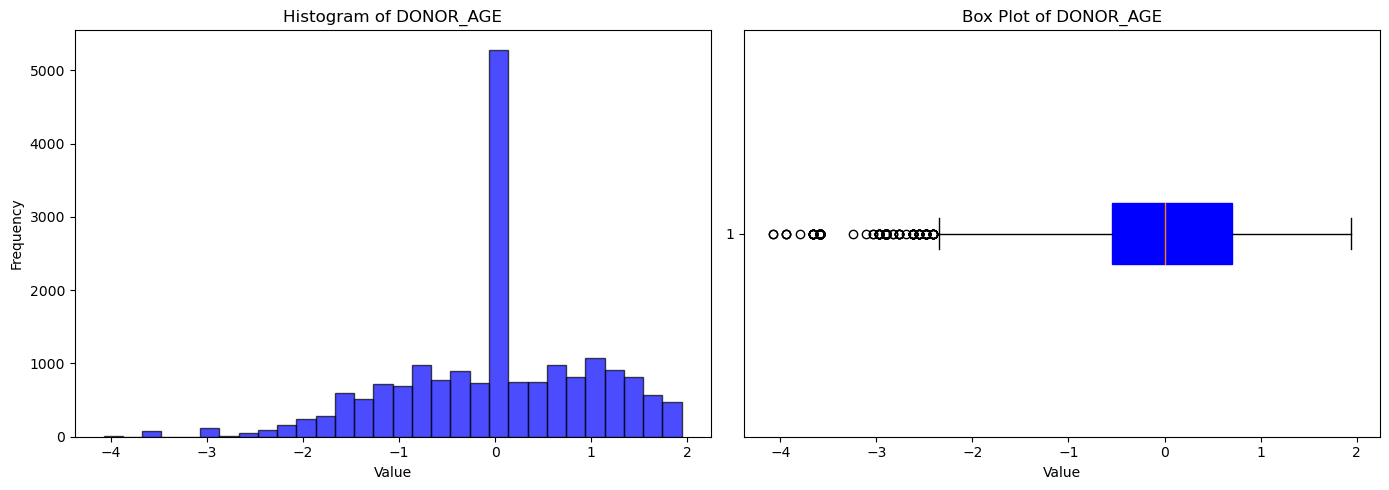

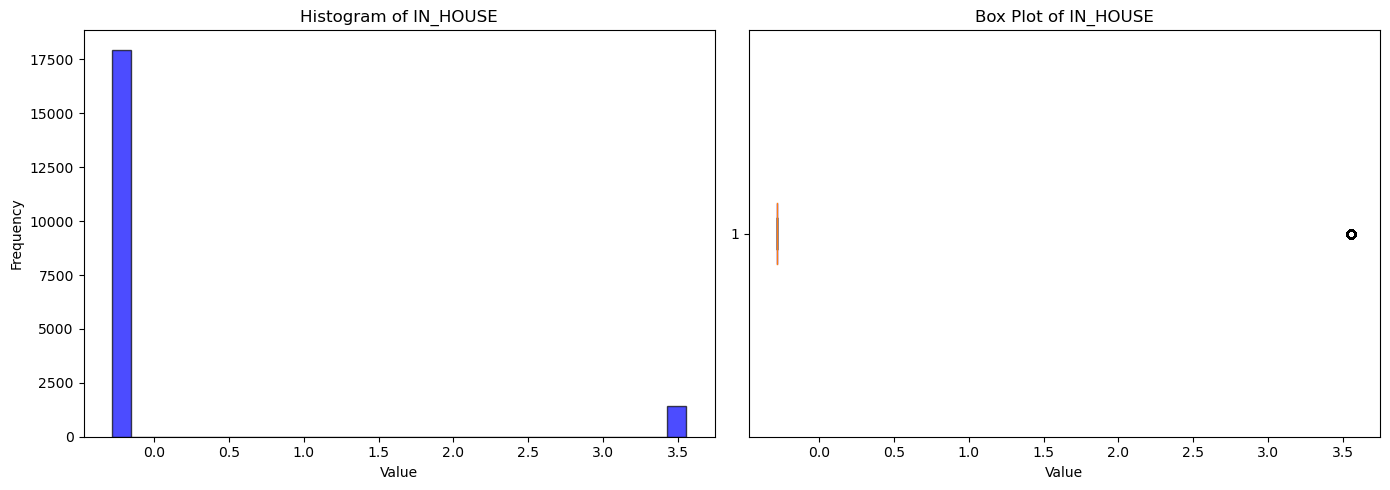

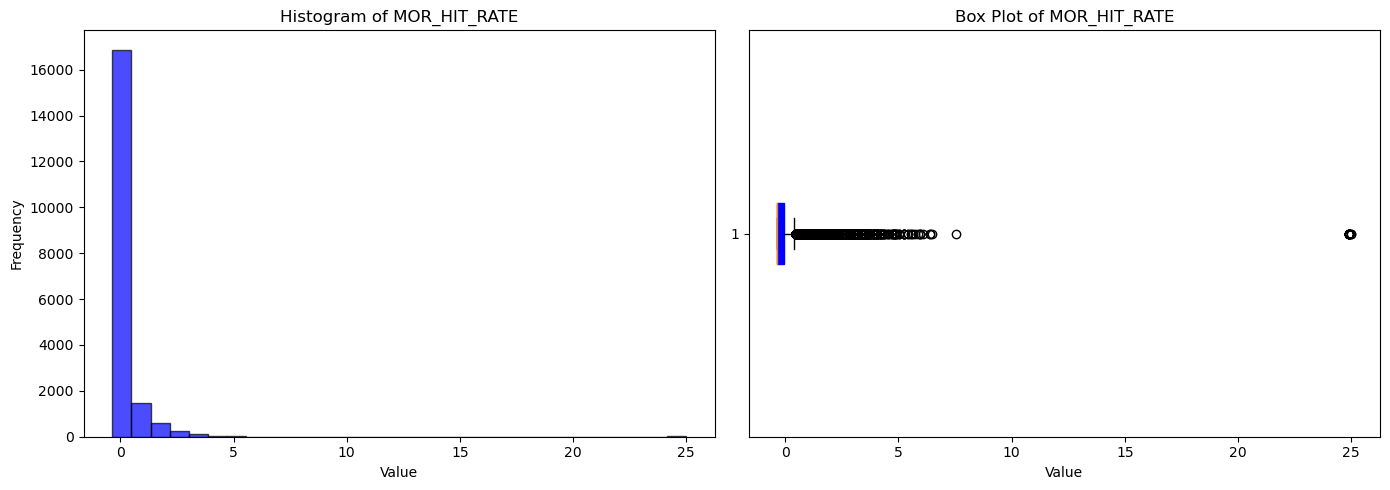

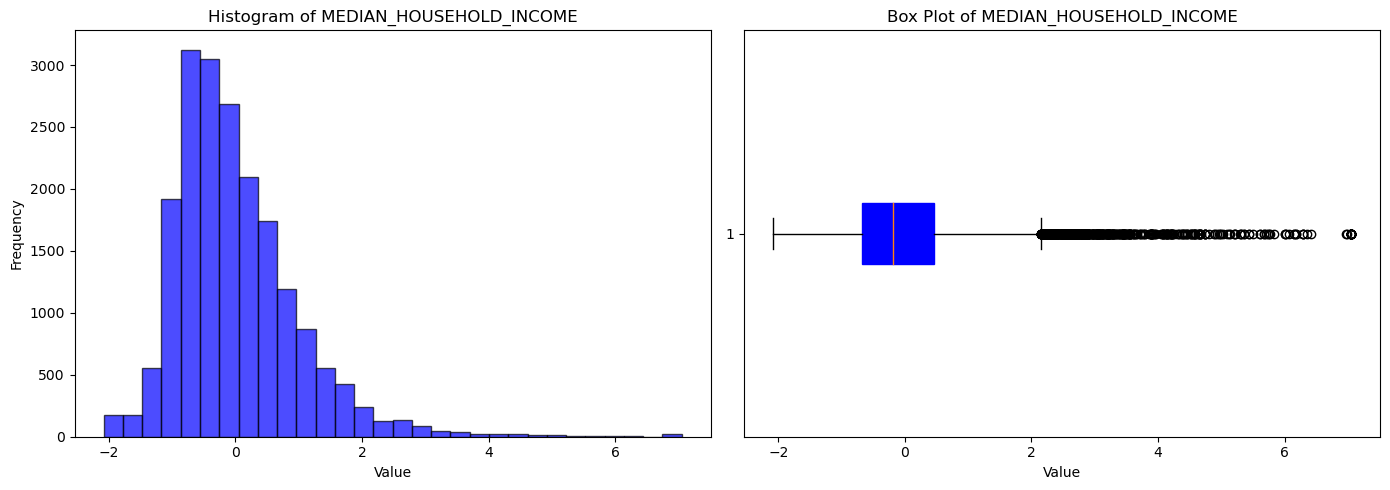

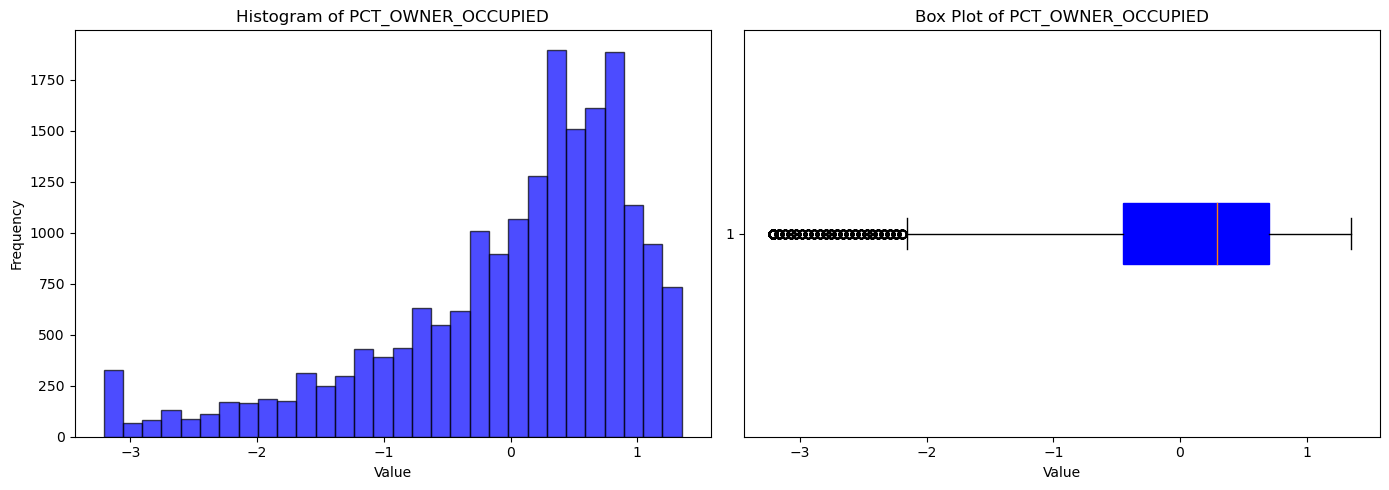

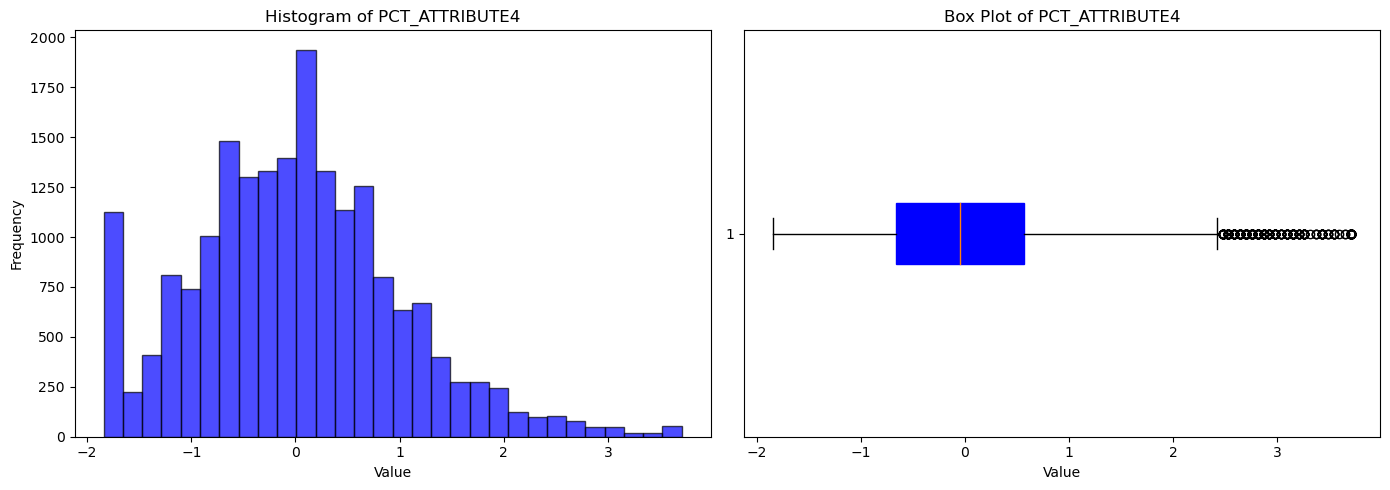

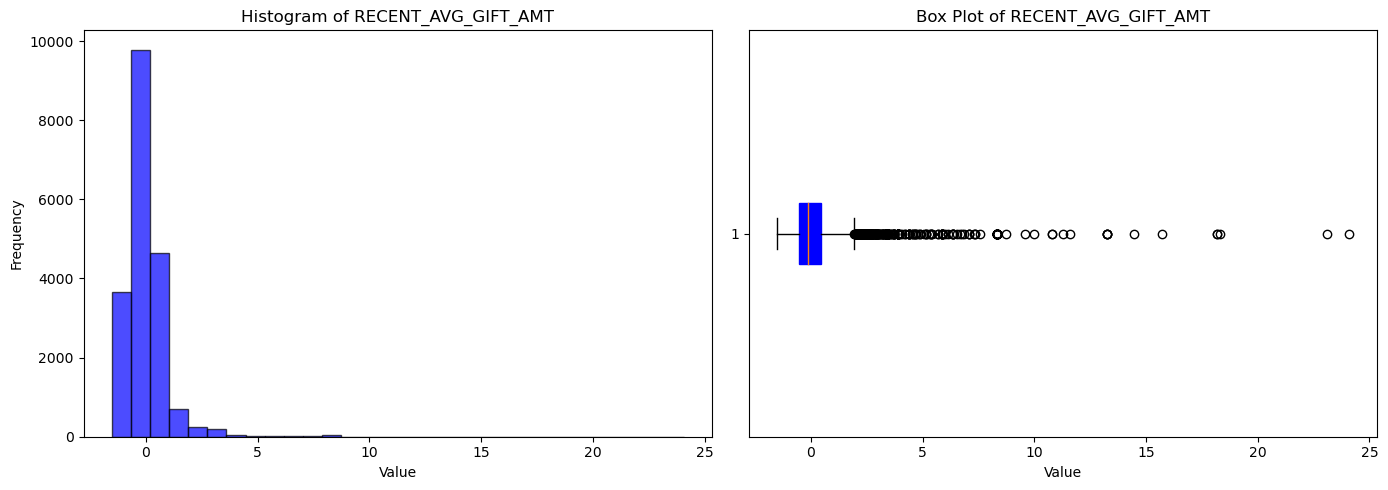

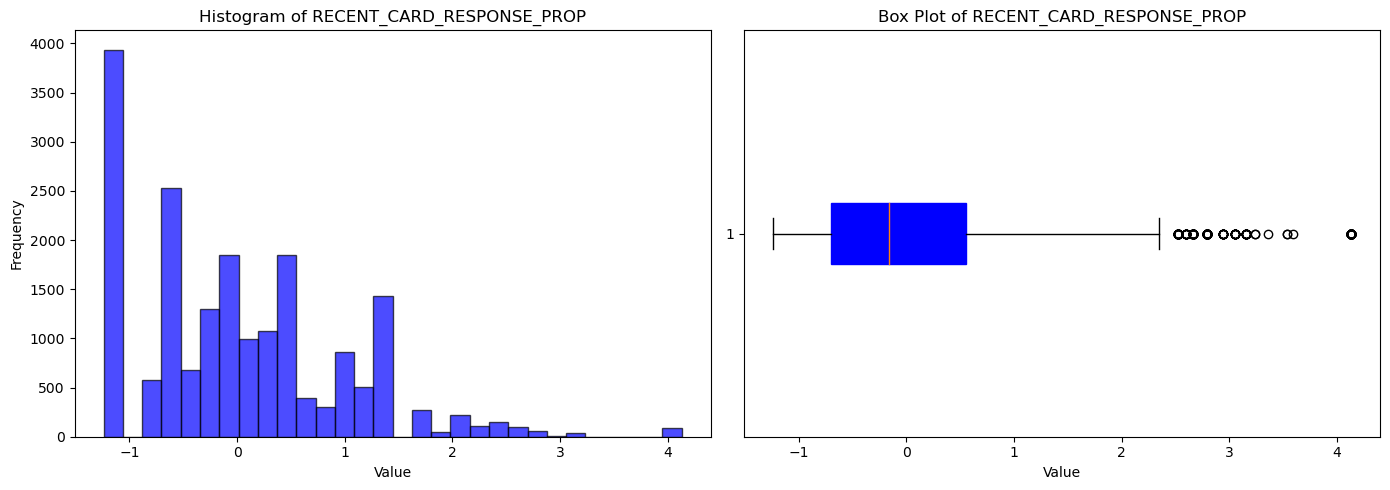

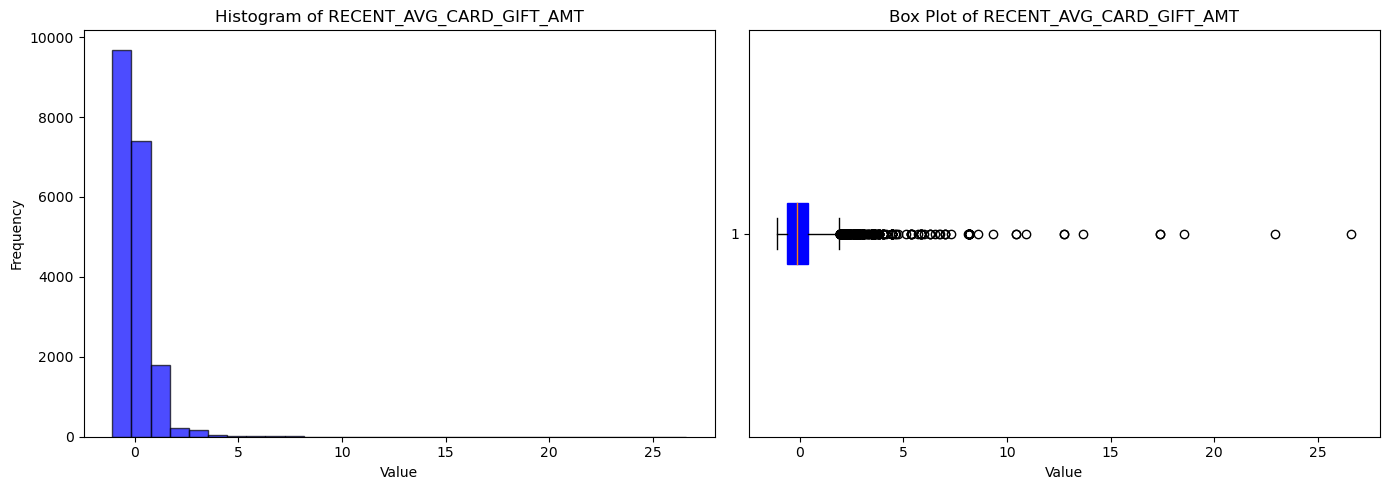

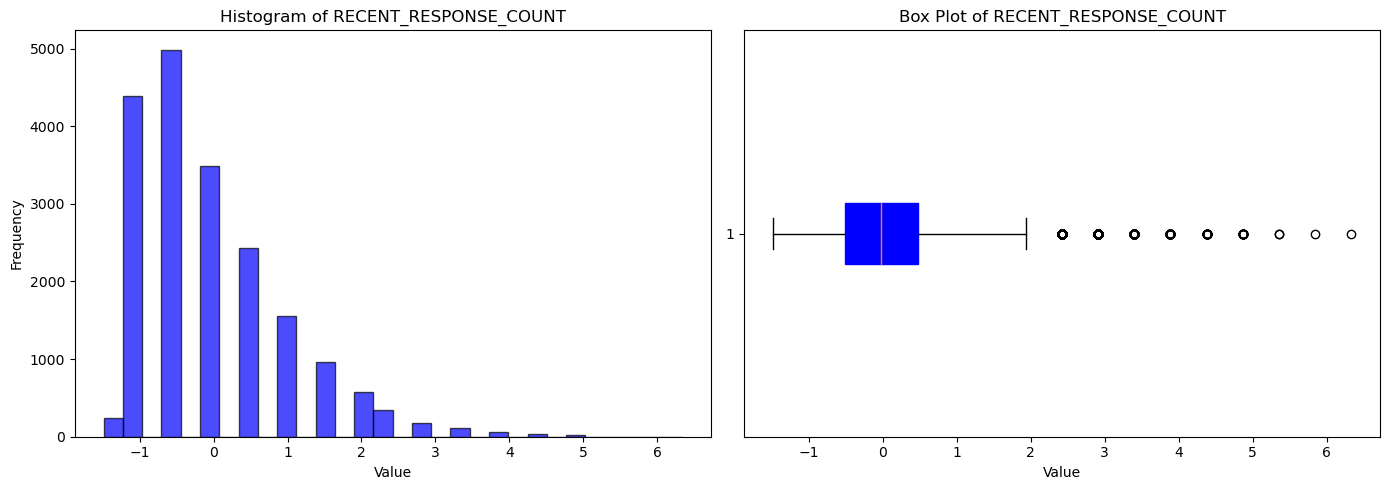

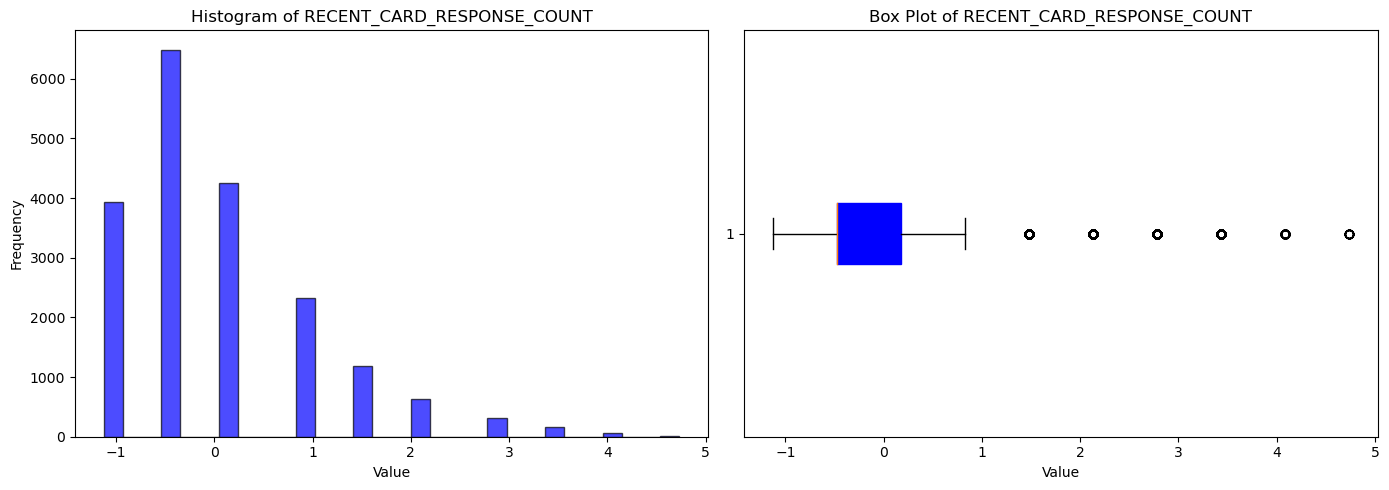

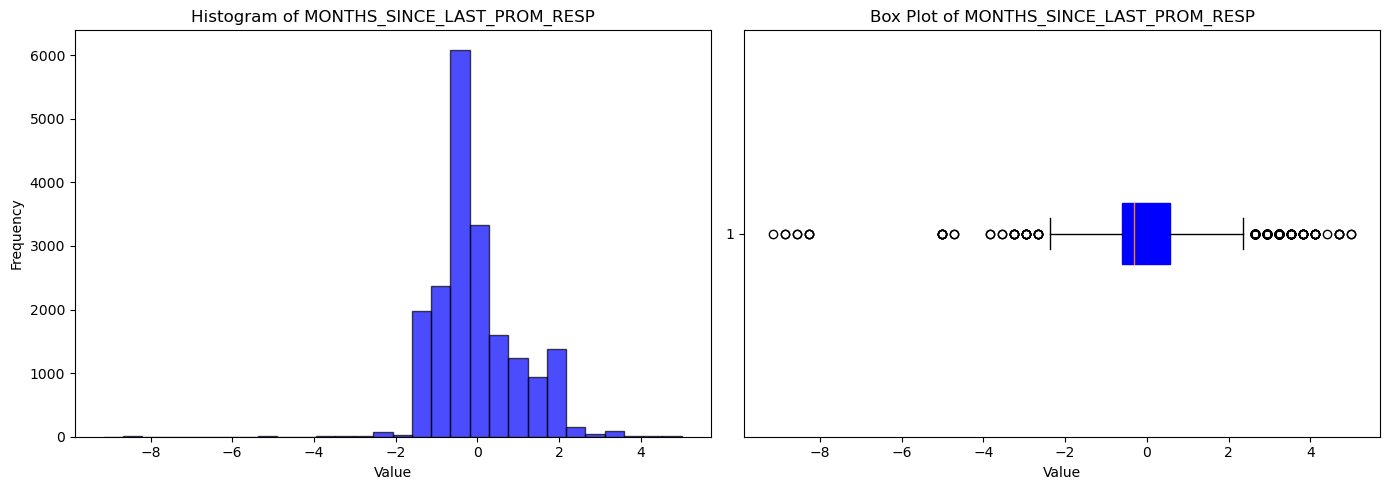

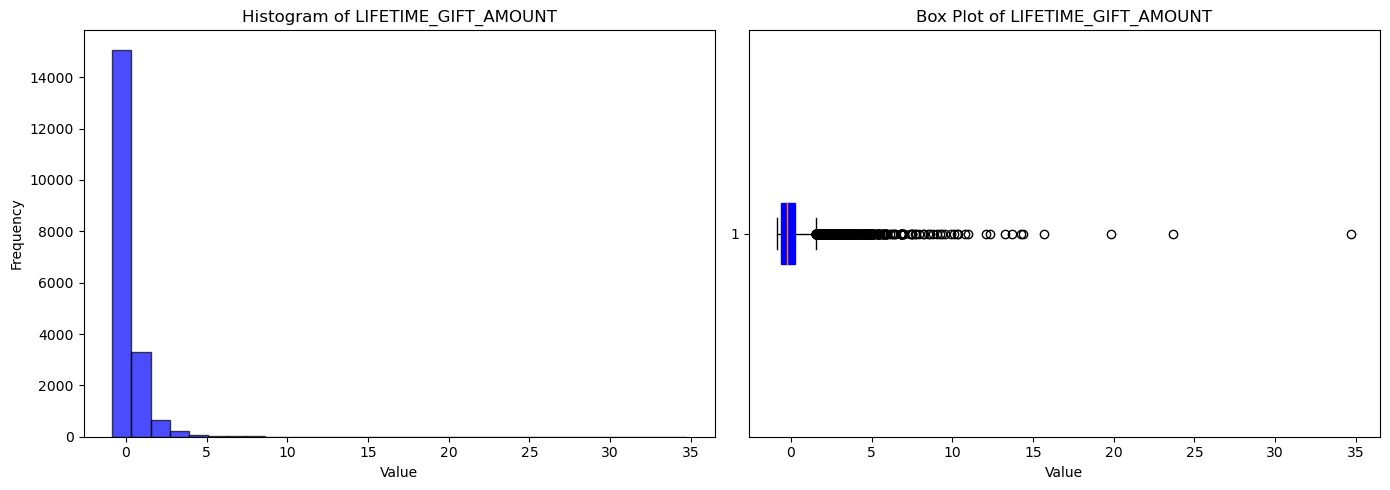

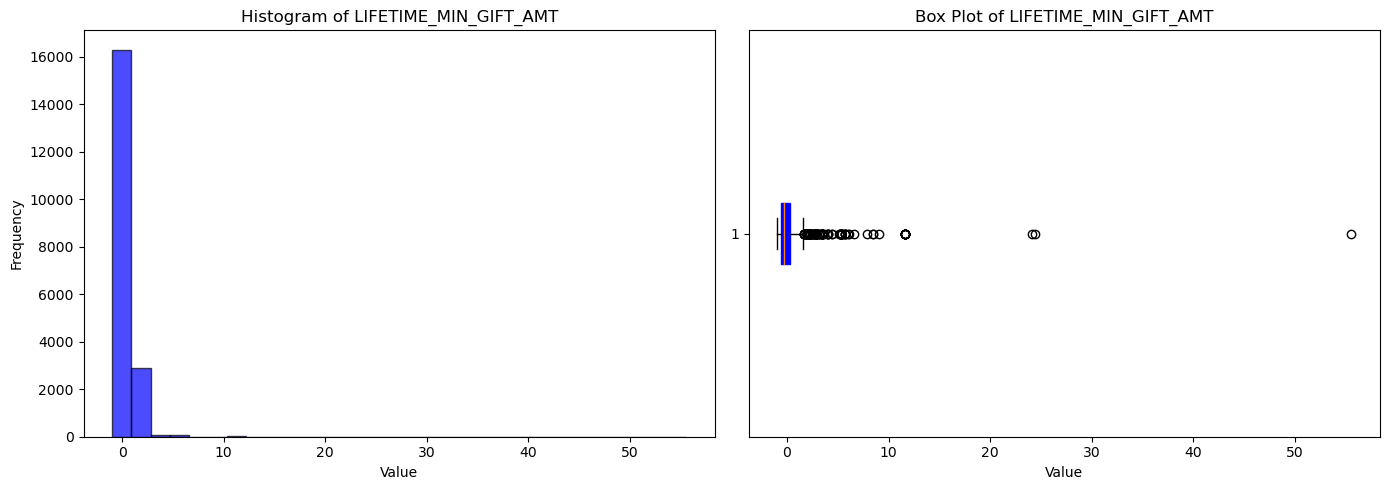

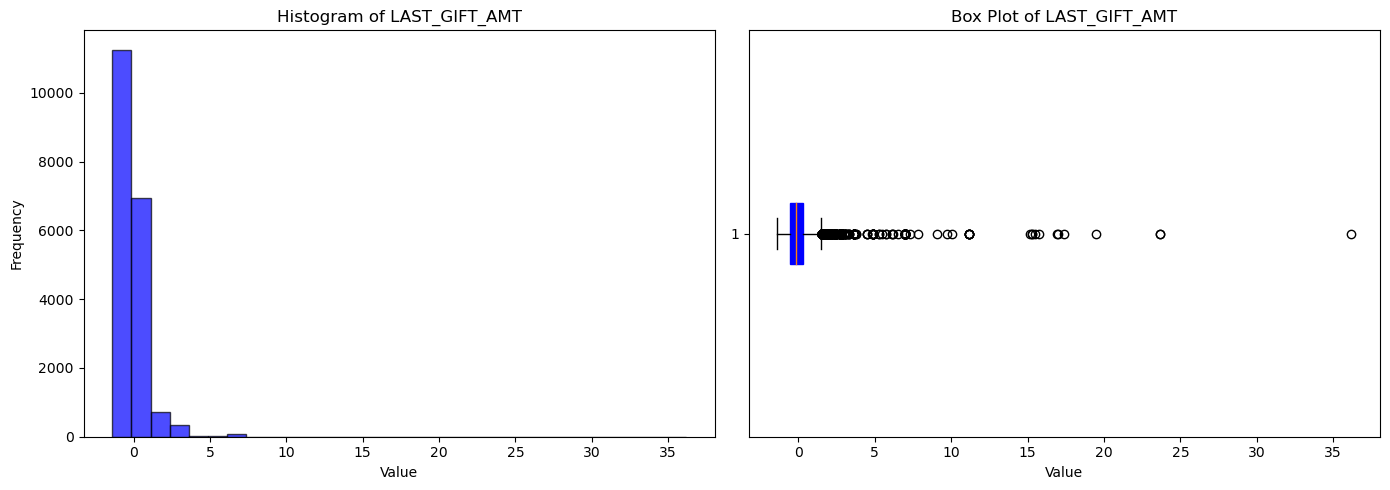

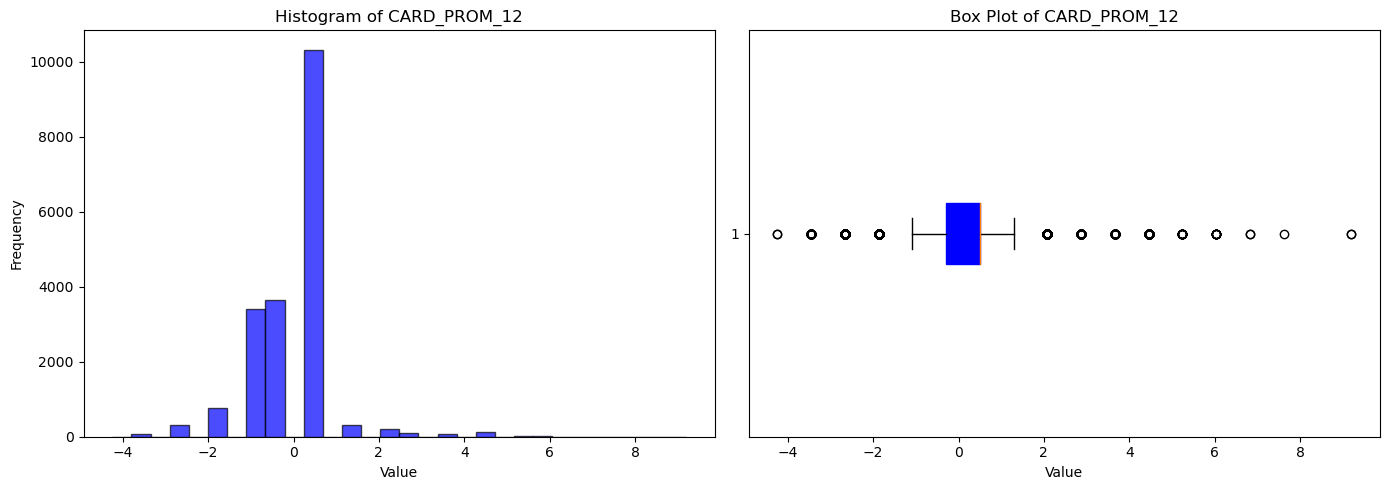

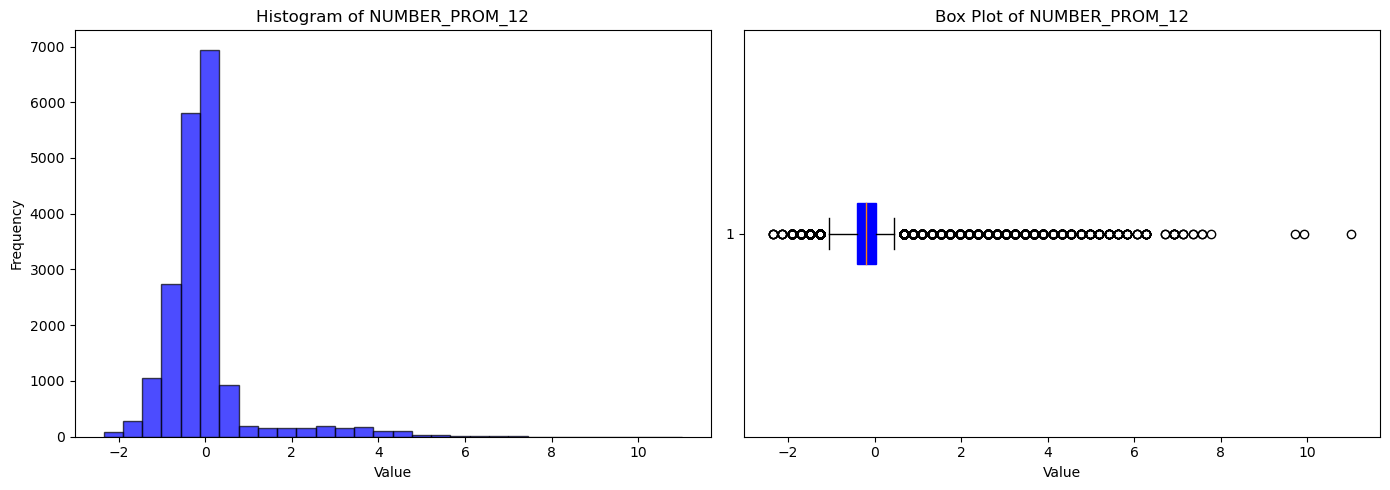

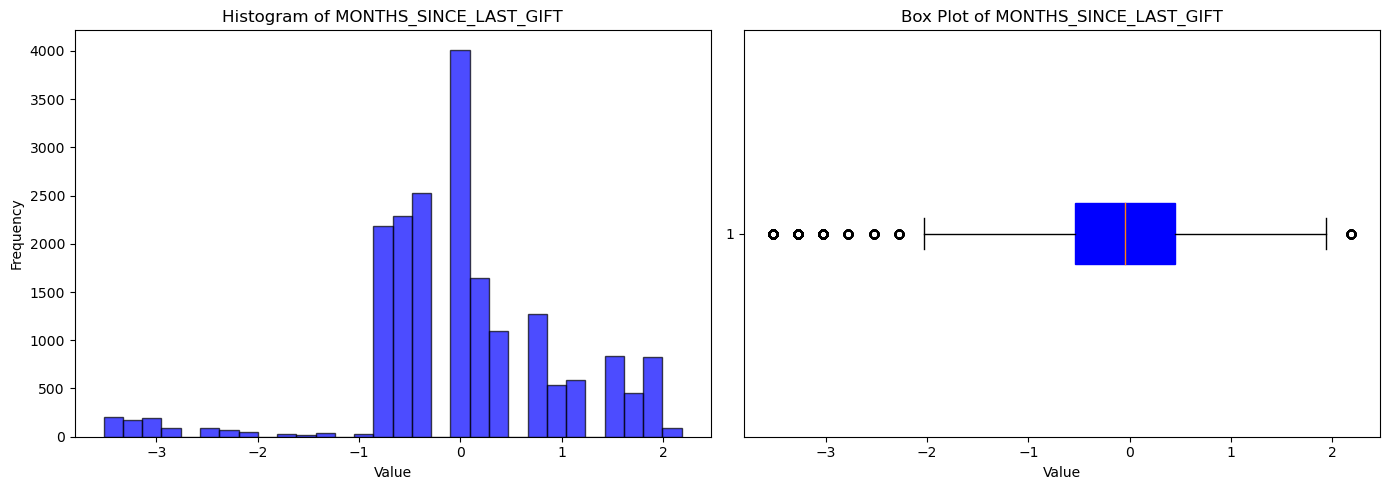

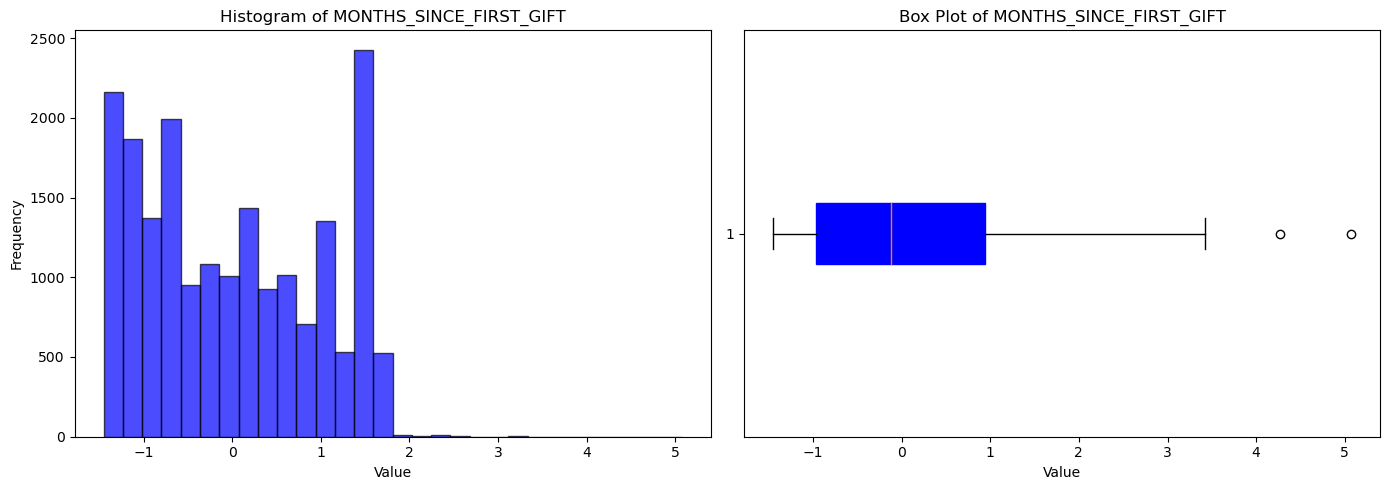

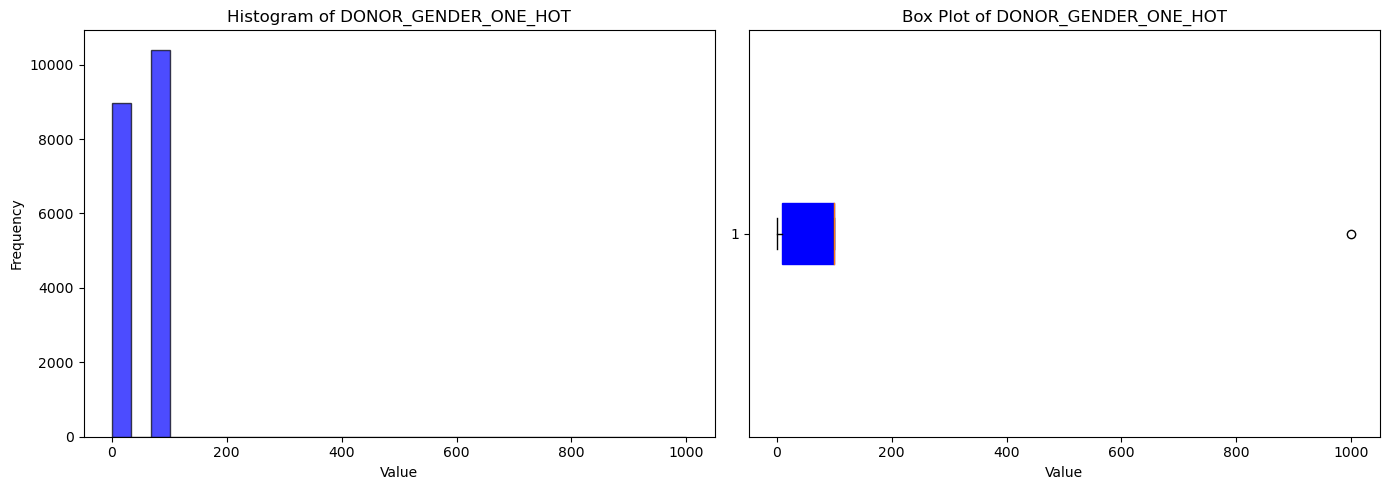

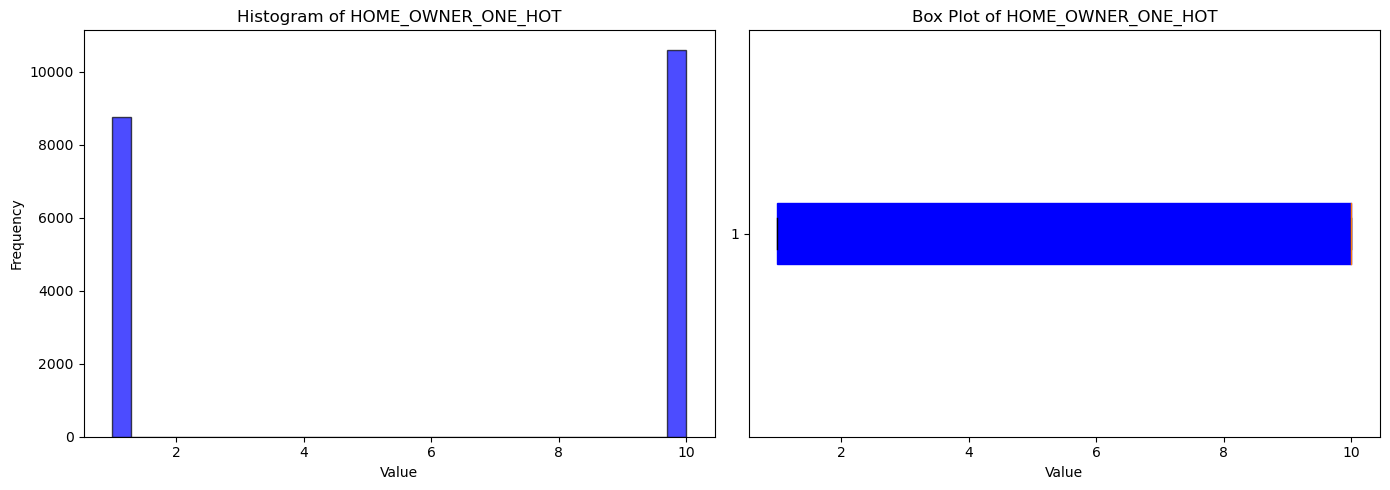

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Donor raw data.csv')  # Replace 'Donor raw data.csv' with the path to your dataset file

# Define the columns with outliers
columns_with_outliers = ['DONOR_AGE', 'IN_HOUSE', 'MOR_HIT_RATE', 'MEDIAN_HOUSEHOLD_INCOME', 
                         'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'RECENT_AVG_GIFT_AMT', 
                         'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 
                         'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 
                         'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 
                         'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 
                         'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'DONOR_GENDER_ONE_HOT', 'HOME_OWNER_ONE_HOT']

# Plot histograms and box plots for each column with outliers
for column in columns_with_outliers:
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axs[0].hist(data[column].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
    axs[0].set_title(f"Histogram of {column}")
    axs[0].set_xlabel("Value")
    axs[0].set_ylabel("Frequency")
    
    # Box plot
    axs[1].boxplot(data[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='blue'))
    axs[1].set_title(f"Box Plot of {column}")
    axs[1].set_xlabel("Value")
    
    plt.tight_layout()
    plt.show()


I need to treat and remove the Outlier 

In [44]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Donor raw data.csv')

# Define the columns with outliers
columns_with_outliers = ['DONOR_AGE', 'IN_HOUSE', 'MOR_HIT_RATE', 'MEDIAN_HOUSEHOLD_INCOME', 
                         'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'RECENT_AVG_GIFT_AMT', 
                         'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 
                         'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 
                         'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 
                         'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 
                         'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 
                         'DONOR_GENDER_ONE_HOT', 'HOME_OWNER_ONE_HOT']

# Function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply capping to each column with outliers
for column in columns_with_outliers:
    cap_outliers(data, column)

# Save the updated DataFrame back to the CSV file
data.to_csv('Donor raw data treated.csv', index=False)

# Print the updated DataFrame to verify the changes
print(data)


       CONTROL_NUMBER  MONTHS_SINCE_ORIGIN     DONOR_AGE  IN_HOUSE  \
0           -1.729225             0.668776  1.942050e+00 -0.281033   
1           -1.729099             1.541408  1.388778e+00 -0.281033   
2           -1.728651             0.959653  1.112142e+00 -0.281033   
3           -1.728633             0.450618  4.914041e-16 -0.281033   
4           -1.728580             0.668776  1.042983e+00 -0.281033   
...               ...                  ...           ...       ...   
19367        1.704140             0.377899  4.897112e-01 -0.281033   
19368        1.704552             1.541408  1.250460e+00 -0.281033   
19369        1.705197            -1.076488  4.914041e-16 -0.281033   
19370        1.705716             1.347490  1.319619e+00 -0.281033   
19371        1.705788            -1.076488  7.663471e-01 -0.281033   

       INCOME_GROUP  PUBLISHED_PHONE  MOR_HIT_RATE  WEALTH_RATING  \
0         -1.163292        -0.995468     -0.353738   4.272647e-16   
1          1.885897  

In [45]:
# Save the updated DataFrame back to the CSV file
data.to_csv('Donor raw data.csv', index=False)

# Print the first few rows of the updated DataFrame to verify changes
print(data.head())


   CONTROL_NUMBER  MONTHS_SINCE_ORIGIN     DONOR_AGE  IN_HOUSE  INCOME_GROUP  \
0       -1.729225             0.668776  1.942050e+00 -0.281033     -1.163292   
1       -1.729099             1.541408  1.388778e+00 -0.281033      1.885897   
2       -1.728651             0.959653  1.112142e+00 -0.281033      0.666221   
3       -1.728633             0.450618  4.914041e-16 -0.281033      1.276059   
4       -1.728580             0.668776  1.042983e+00 -0.281033     -1.163292   

   PUBLISHED_PHONE  MOR_HIT_RATE  WEALTH_RATING  MEDIAN_HOUSEHOLD_INCOME  \
0        -0.995468     -0.353738   4.272647e-16                -0.292139   
1        -0.995468     -0.353738  -9.647106e-01                -0.791519   
2        -0.995468     -0.353738   1.921633e+00                 0.383851   
3         1.004553     -0.353738  -4.836534e-01                -1.150829   
4         1.004553      0.435467  -2.596124e-03                -0.085079   

   PCT_OWNER_OCCUPIED  ...  LIFETIME_MIN_GIFT_AMT  LAST_GIFT_A

In [46]:
# Save the updated scaled DataFrame back to the CSV file
data.to_csv('Donor raw data.csv', index=False)

TREATMENT OF OUTLIERS

In [47]:
import pandas as pd
import numpy as np

# Load your dataset
data = pd.read_csv('Donor raw data.csv')  # Replace with your actual file path

# Define the columns to treat for outliers
columns_with_outliers = [
    'DONOR_AGE', 'IN_HOUSE', 'MOR_HIT_RATE', 'MEDIAN_HOUSEHOLD_INCOME', 
    'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'RECENT_AVG_GIFT_AMT', 
    'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 
    'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 
    'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 
    'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 
    'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 
    'DONOR_GENDER_ONE_HOT', 'HOME_OWNER_ONE_HOT'
]

# Compute the Z-scores for these columns
z_scores = np.abs((data[columns_with_outliers] - data[columns_with_outliers].mean()) / data[columns_with_outliers].std())

# Set a threshold for identifying outliers
threshold = 3

# Filter out rows where any Z-score is greater than the threshold
data_clean = data[(z_scores < threshold).all(axis=1)]

# Check the shape of the data before and after removing outliers
print(f"Original data shape: {data.shape}")
print(f"Data shape after removing outliers: {data_clean.shape}")

# Save the cleaned data to a new CSV file
data.to_csv('Donor raw data.csv', index=False)

print("Outliers removed and cleaned data saved to 'Donor raw data.csv'.")


Original data shape: (19372, 29)
Data shape after removing outliers: (19365, 29)
Outliers removed and cleaned data saved to 'Donor raw data.csv'.


In [48]:
# Print the columns with outlier counts
print("Columns with Outliers:")
print(columns_with_outliers)

Columns with Outliers:
['DONOR_AGE', 'IN_HOUSE', 'MOR_HIT_RATE', 'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'DONOR_GENDER_ONE_HOT', 'HOME_OWNER_ONE_HOT']


In [49]:

# Load your dataset
data = pd.read_csv('Donor raw data.csv')  # Replace with your actual file path

# Define the columns to treat for outliers
columns_with_outliers = [
    'DONOR_AGE', 'IN_HOUSE', 'MOR_HIT_RATE', 'MEDIAN_HOUSEHOLD_INCOME', 
    'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'RECENT_AVG_GIFT_AMT', 
    'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 
    'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 
    'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 
    'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 
    'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 
    'DONOR_GENDER_ONE_HOT', 'HOME_OWNER_ONE_HOT'
]

# Function to calculate the number of outliers based on Z-score threshold
def count_outliers(data, columns, threshold=3):
    z_scores = np.abs((data[columns] - data[columns].mean()) / data[columns].std())
    outlier_counts = (z_scores > threshold).sum()
    return outlier_counts

# Calculate the number of outliers before removal
outliers_before = count_outliers(data, columns_with_outliers)

# Compute the Z-scores for these columns
z_scores = np.abs((data[columns_with_outliers] - data[columns_with_outliers].mean()) / data[columns_with_outliers].std())

# Set a threshold for identifying outliers
threshold = 3

# Filter out rows where any Z-score is greater than the threshold
data_clean = data[(z_scores < threshold).all(axis=1)]

# Calculate the number of outliers after removal
outliers_after = count_outliers(data_clean, columns_with_outliers)

# Print the outlier counts before and after removal
print("Outlier Counts Before Removal:")
print(outliers_before)
print("\nOutlier Counts After Removal:")
print(outliers_after)

# Save the cleaned data to a new CSV file
data_clean.to_csv('Donor raw data.csv', index=False)

print("Outliers removed and cleaned data saved to 'Donor raw data.csv'.")


Outlier Counts Before Removal:
DONOR_AGE                      0
IN_HOUSE                       0
MOR_HIT_RATE                   0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PCT_ATTRIBUTE4                 0
RECENT_AVG_GIFT_AMT            0
RECENT_CARD_RESPONSE_PROP      0
RECENT_AVG_CARD_GIFT_AMT       0
RECENT_RESPONSE_COUNT          0
RECENT_CARD_RESPONSE_COUNT     0
MONTHS_SINCE_LAST_PROM_RESP    0
LIFETIME_GIFT_AMOUNT           0
LIFETIME_MIN_GIFT_AMT          0
LAST_GIFT_AMT                  0
CARD_PROM_12                   0
NUMBER_PROM_12                 0
MONTHS_SINCE_LAST_GIFT         0
MONTHS_SINCE_FIRST_GIFT        6
DONOR_GENDER_ONE_HOT           1
HOME_OWNER_ONE_HOT             0
dtype: int64

Outlier Counts After Removal:
DONOR_AGE                      0
IN_HOUSE                       0
MOR_HIT_RATE                   0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PCT_ATTRIBUTE4                 0
RECENT_AVG_GIFT_AMT            0
R

In [50]:
# Save the updated scaled DataFrame back to the CSV file
data.to_csv('Donor raw data.csv', index=False)

 Visualization of Boxplot and Histogram after removing outliers

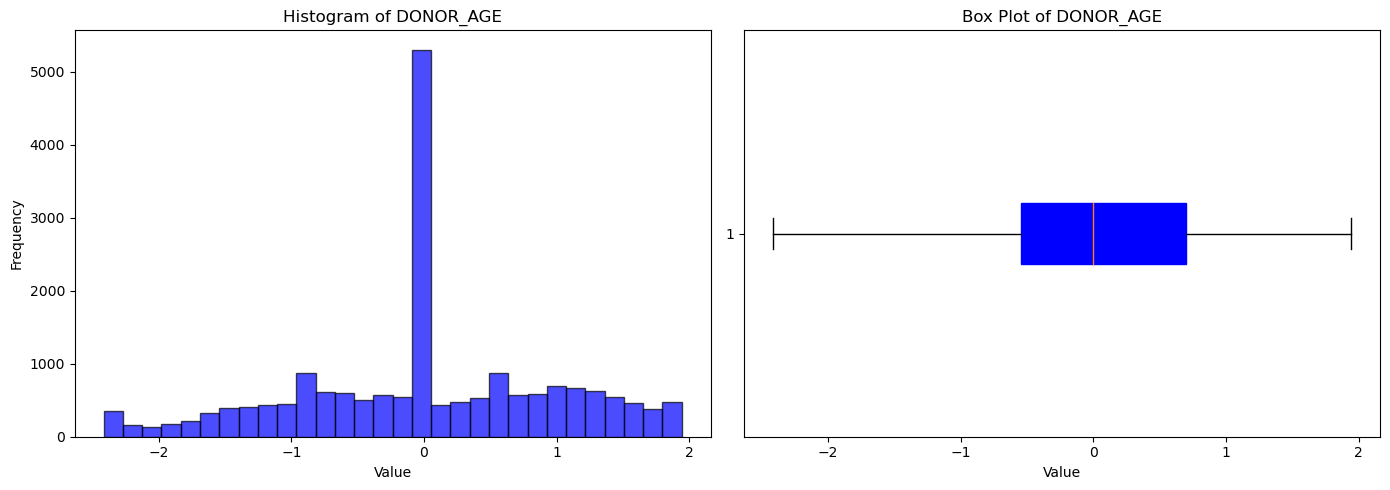

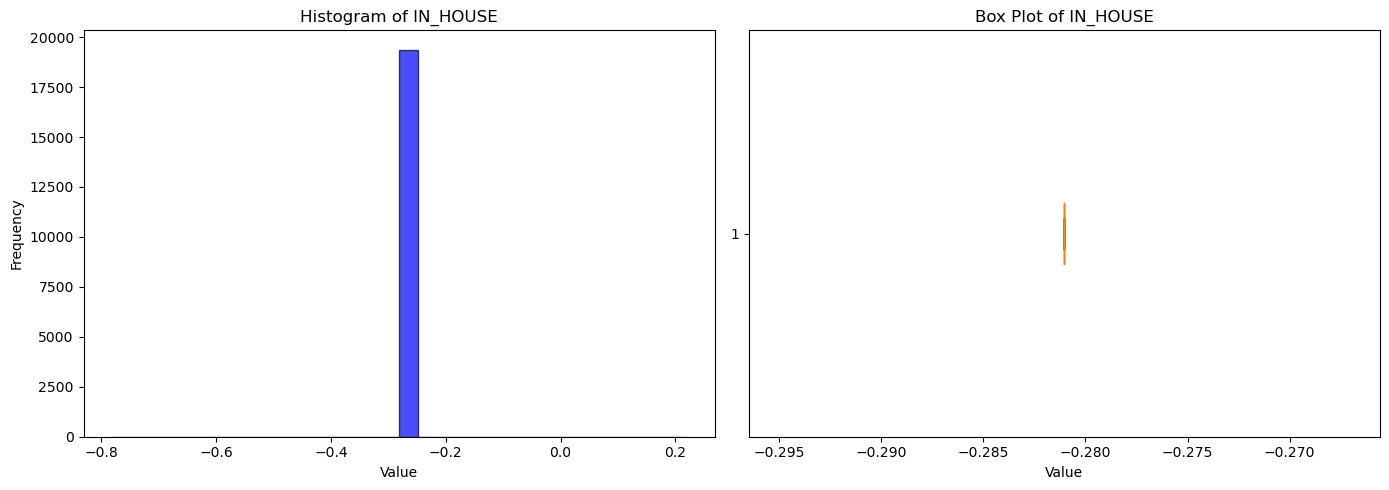

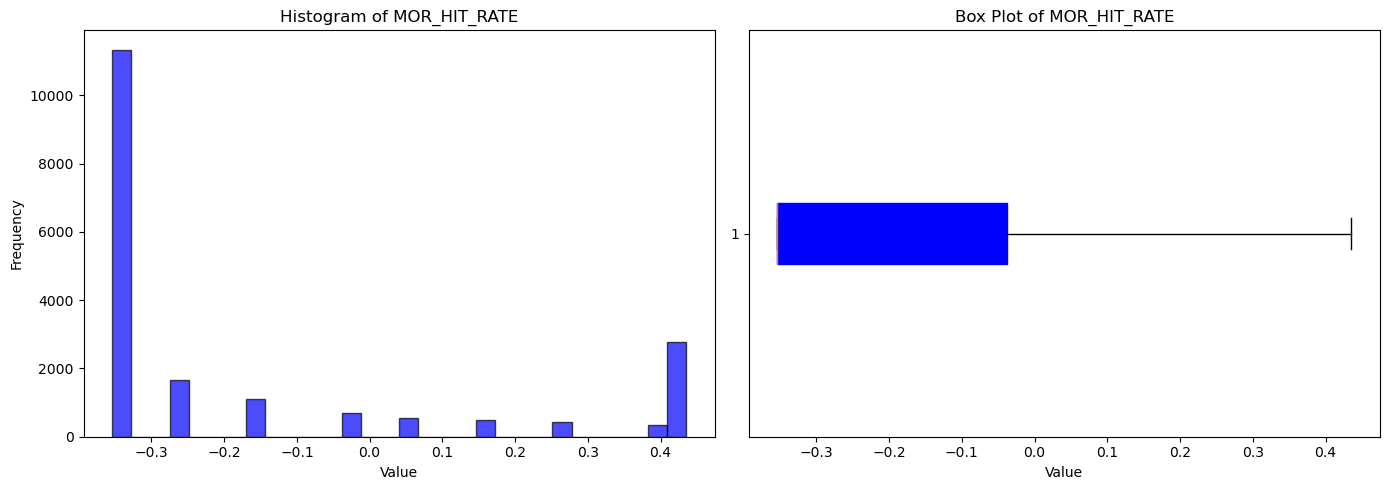

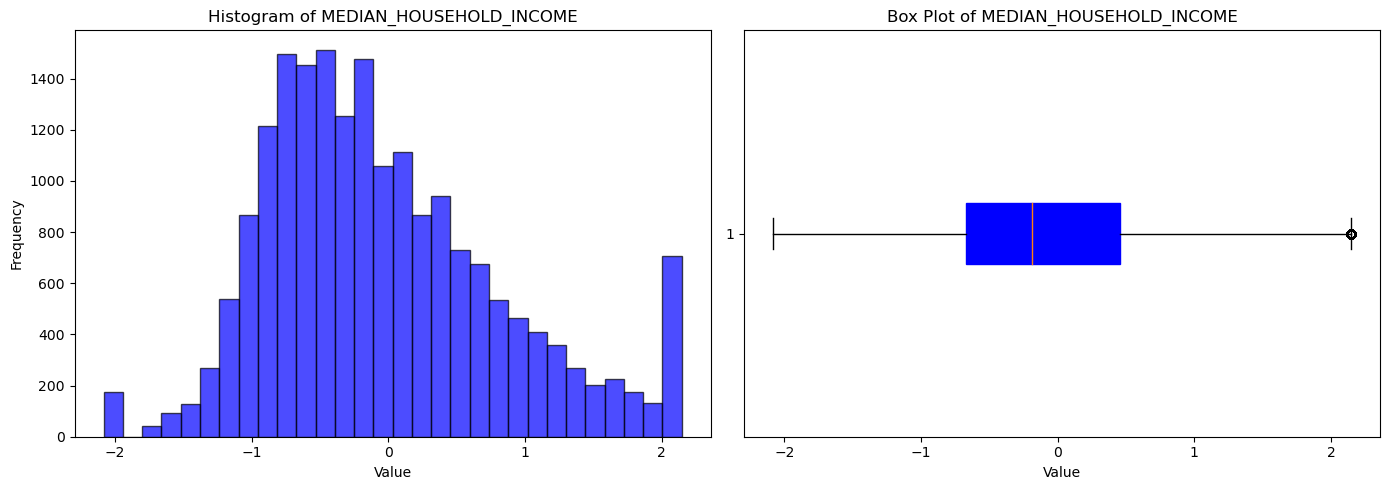

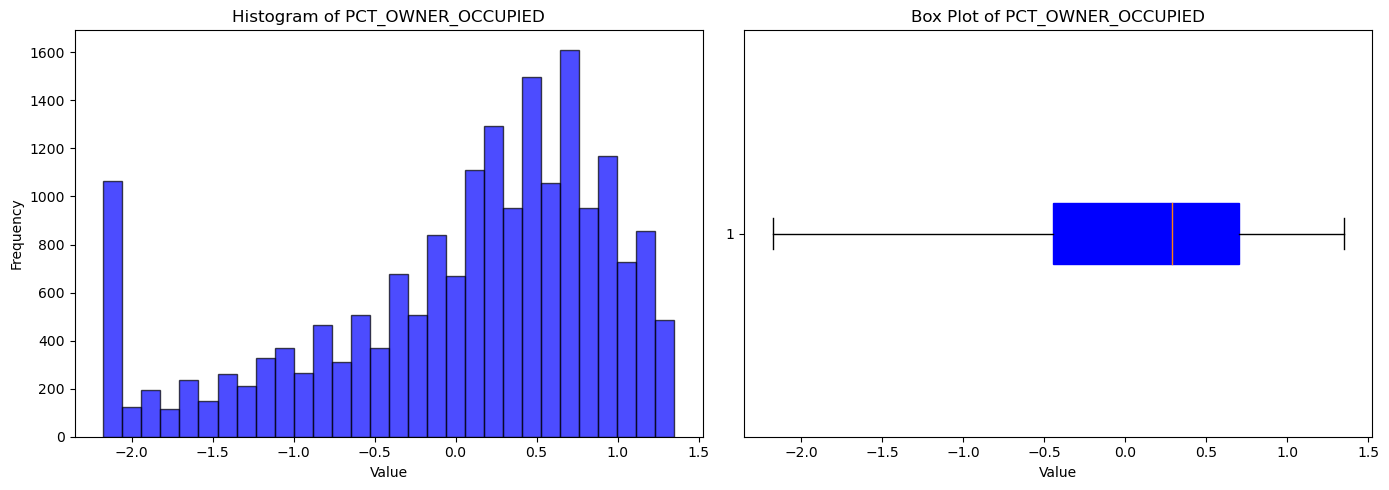

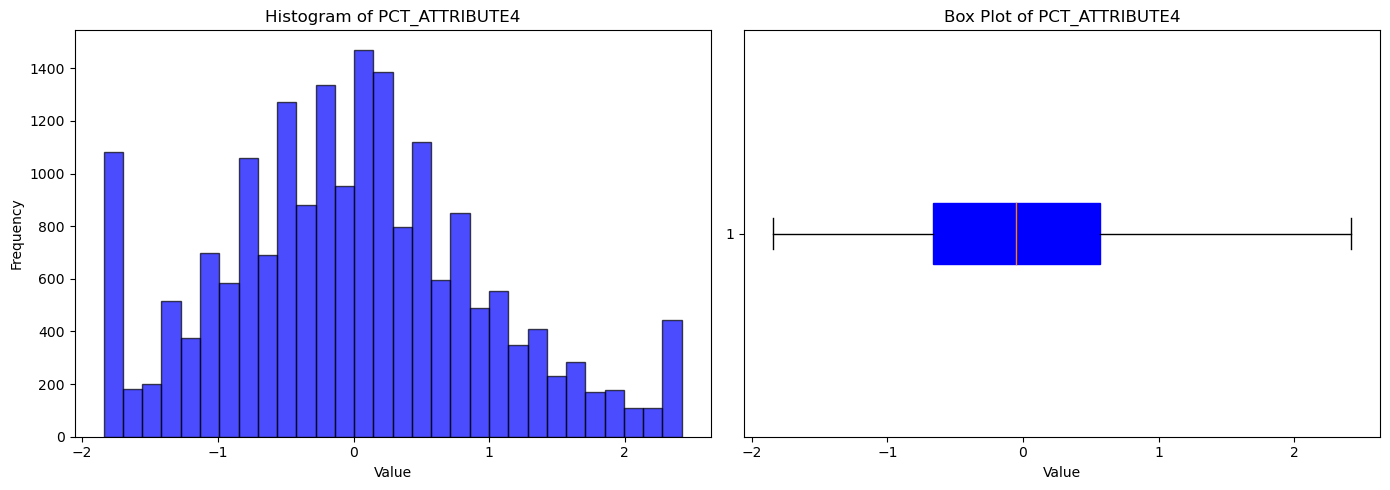

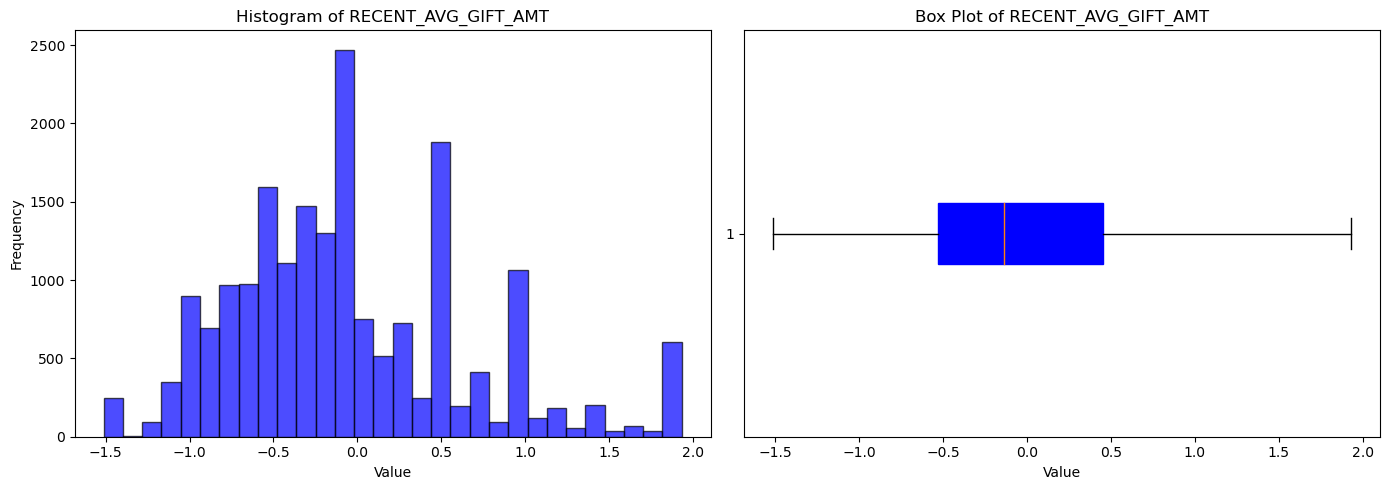

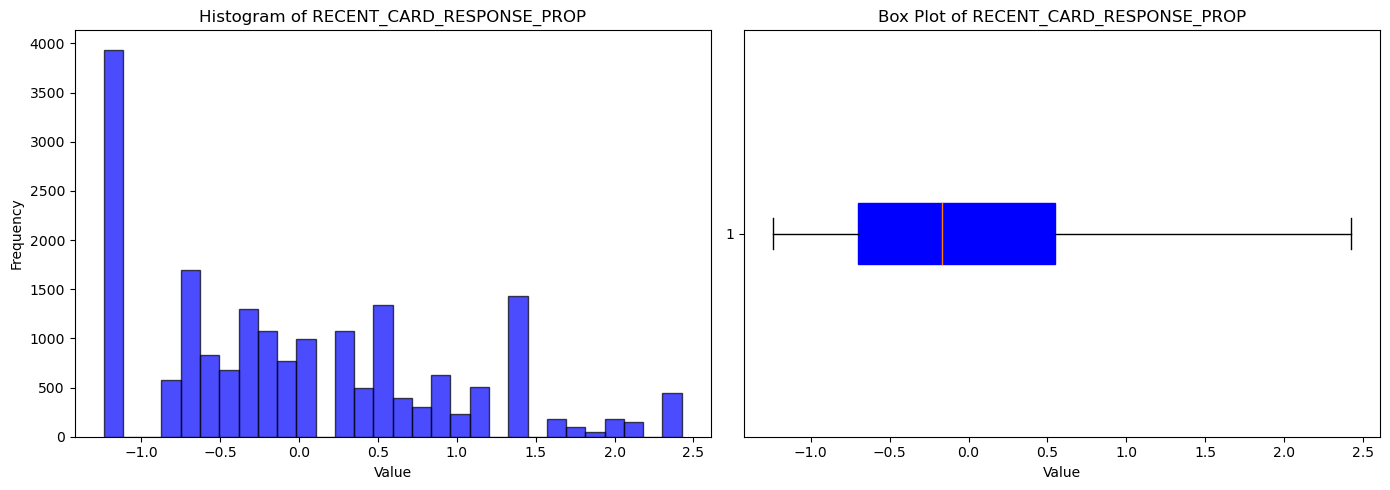

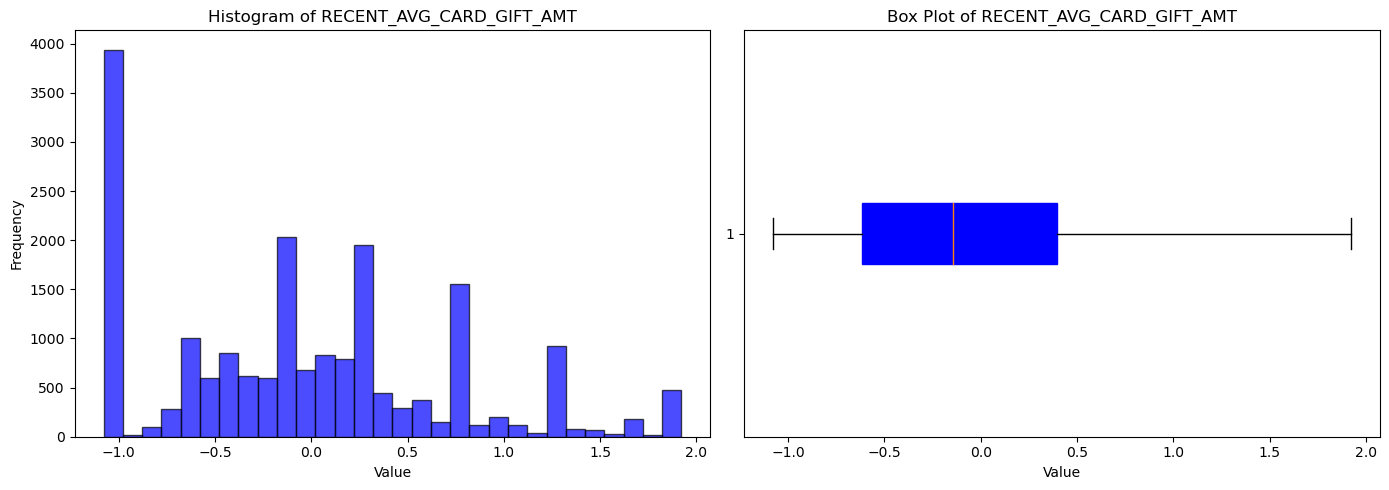

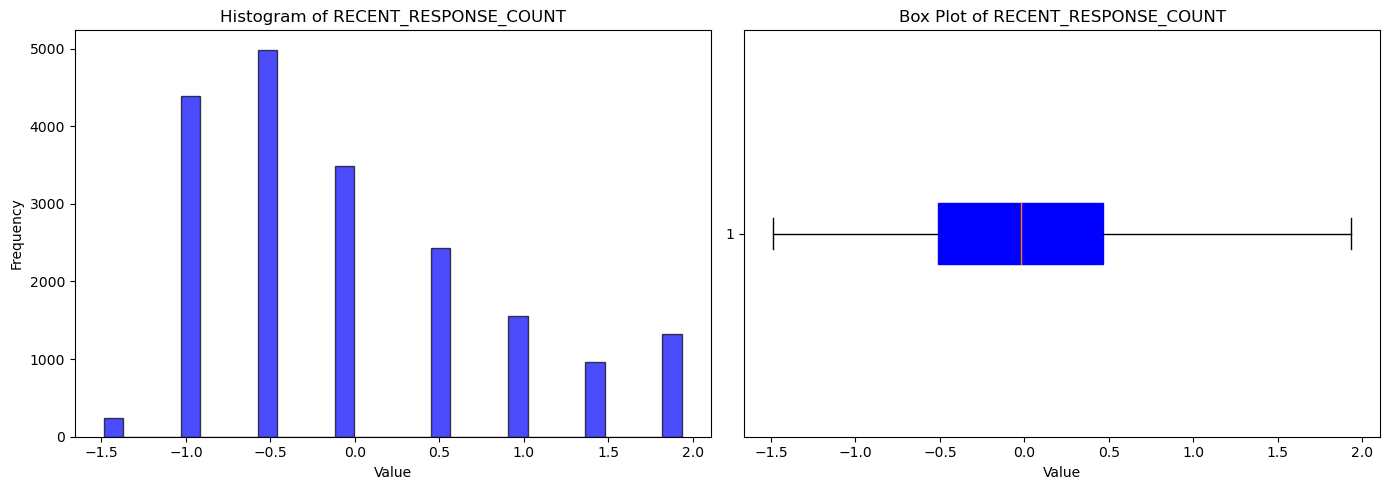

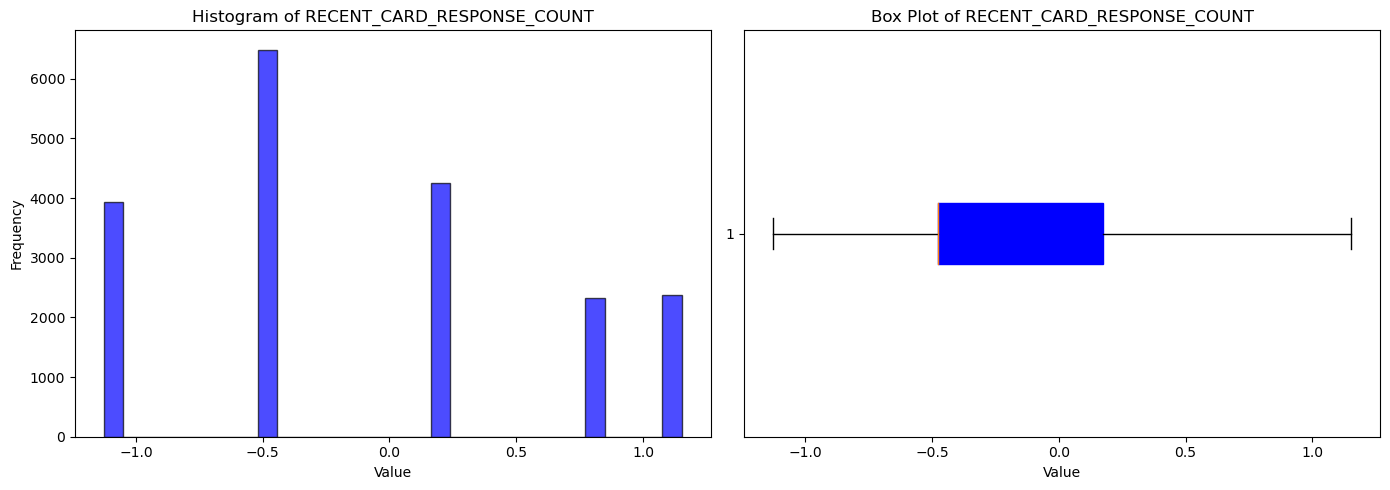

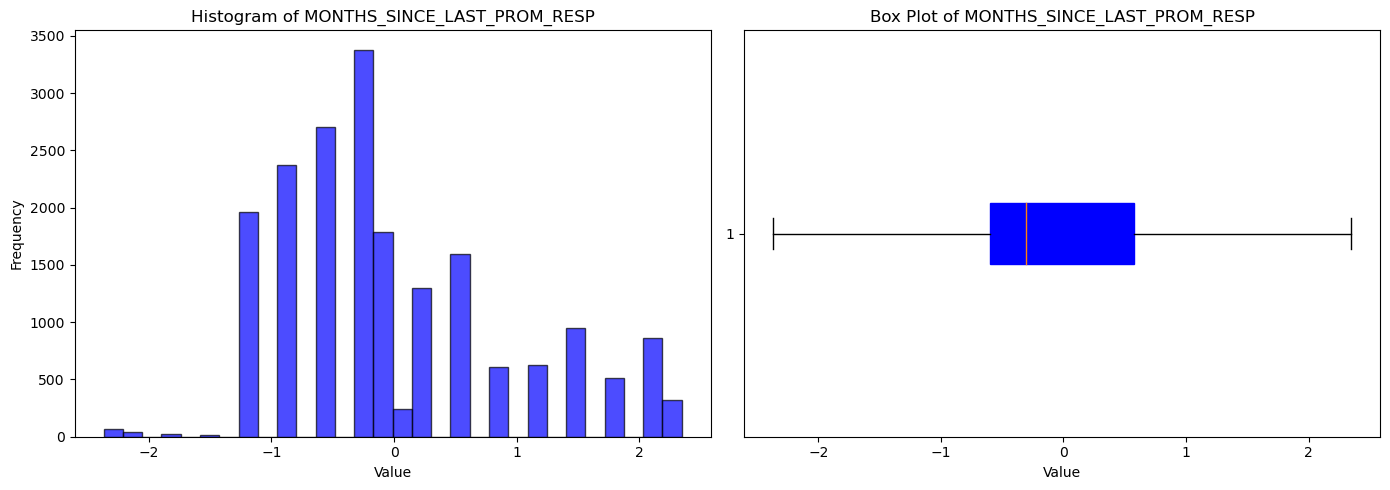

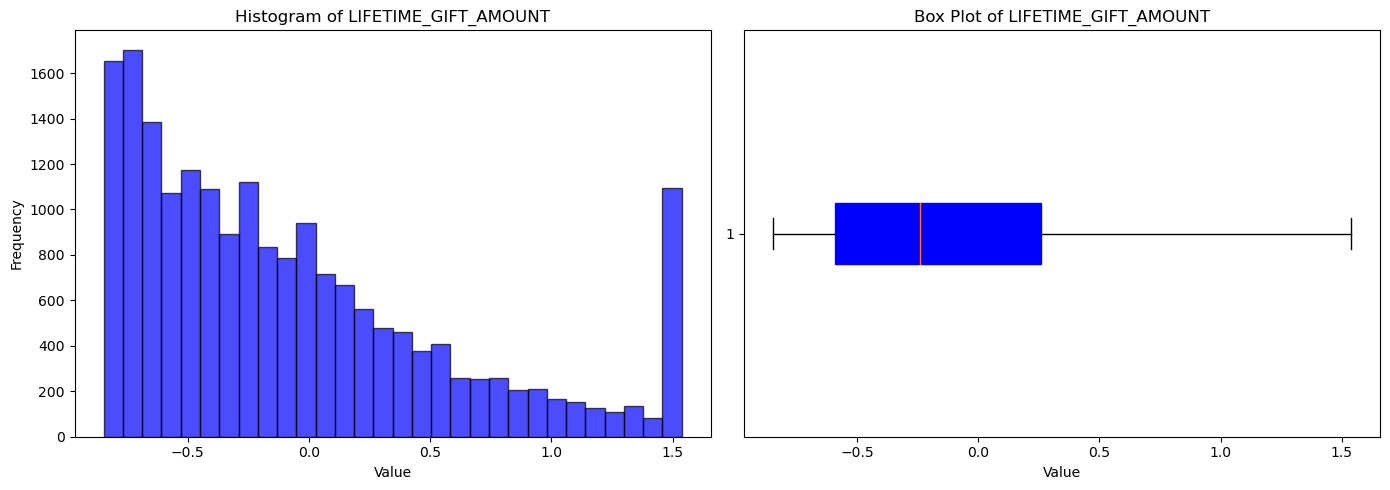

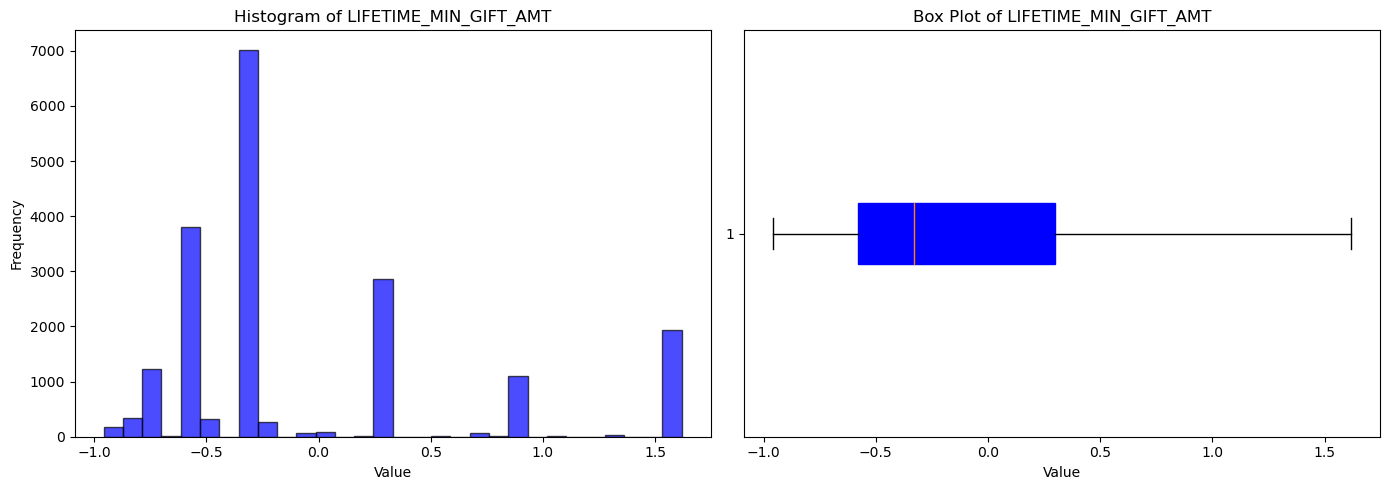

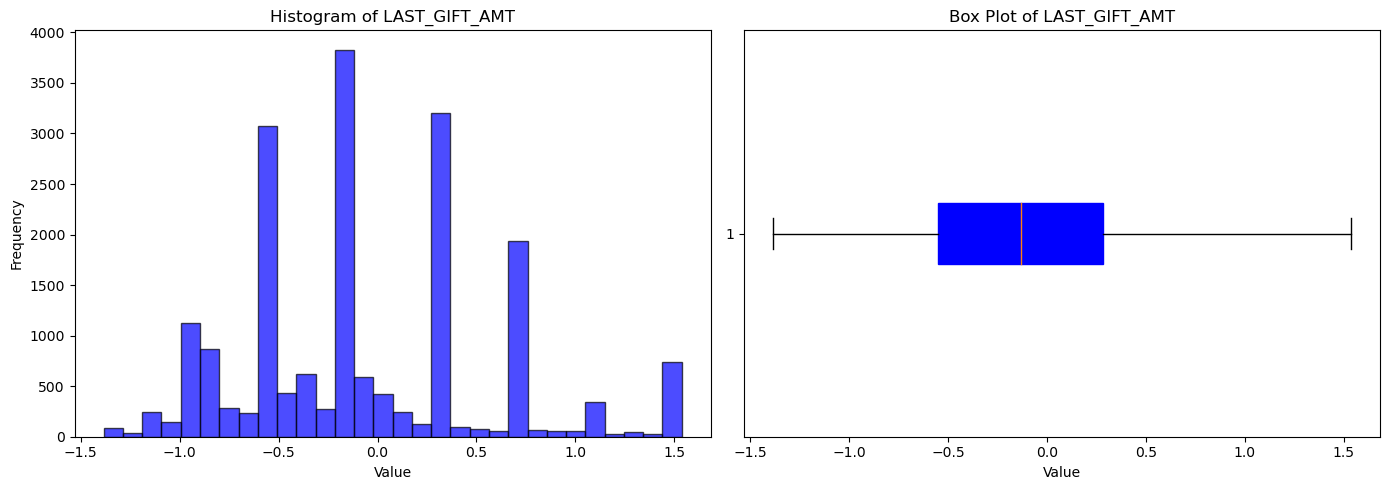

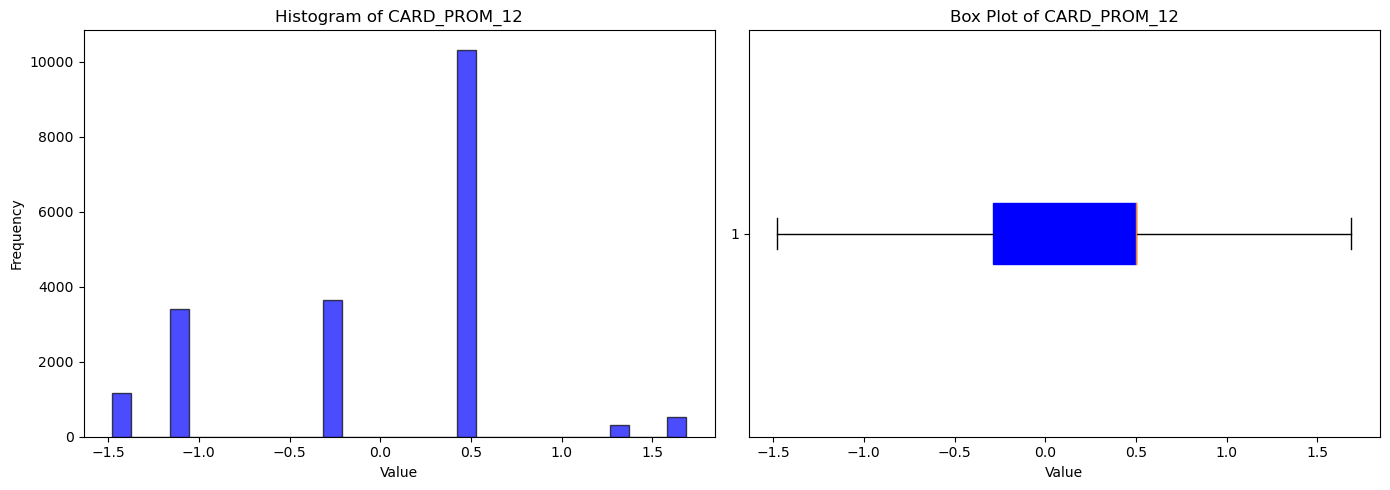

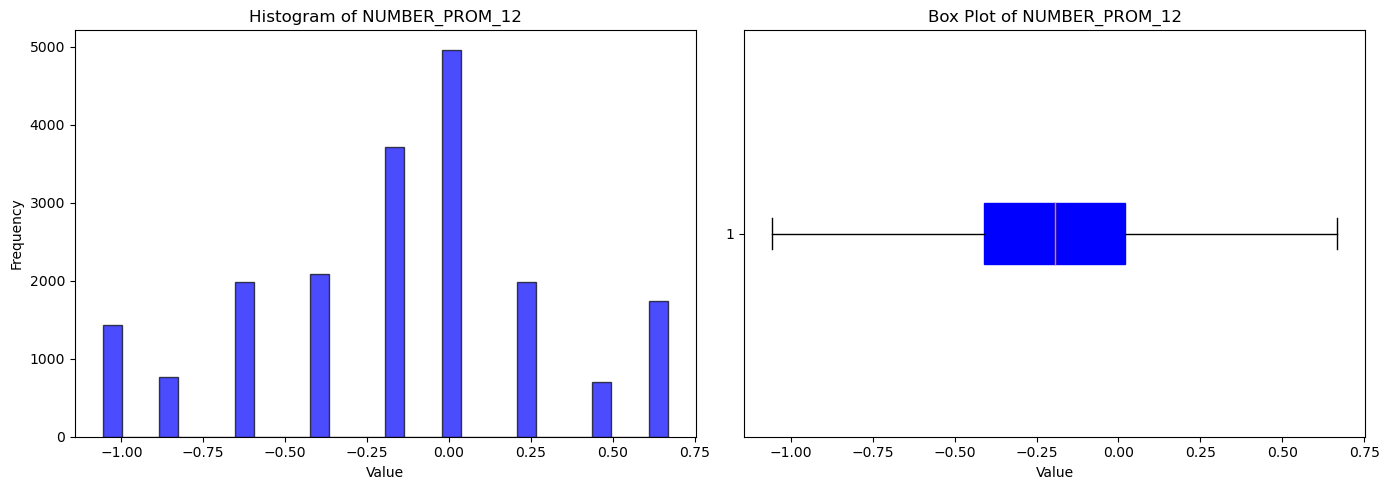

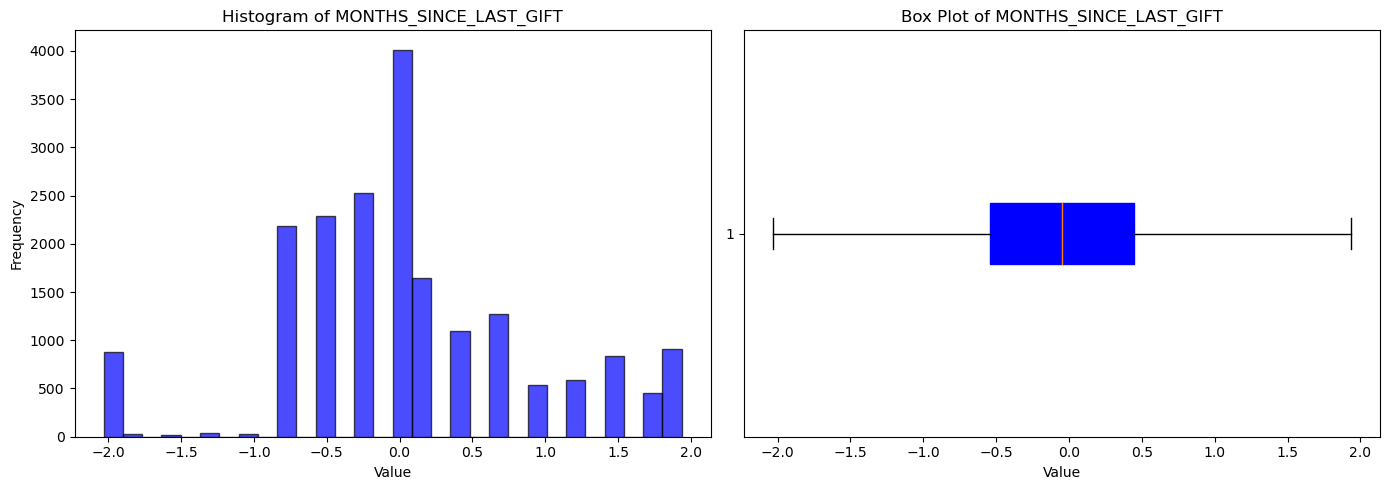

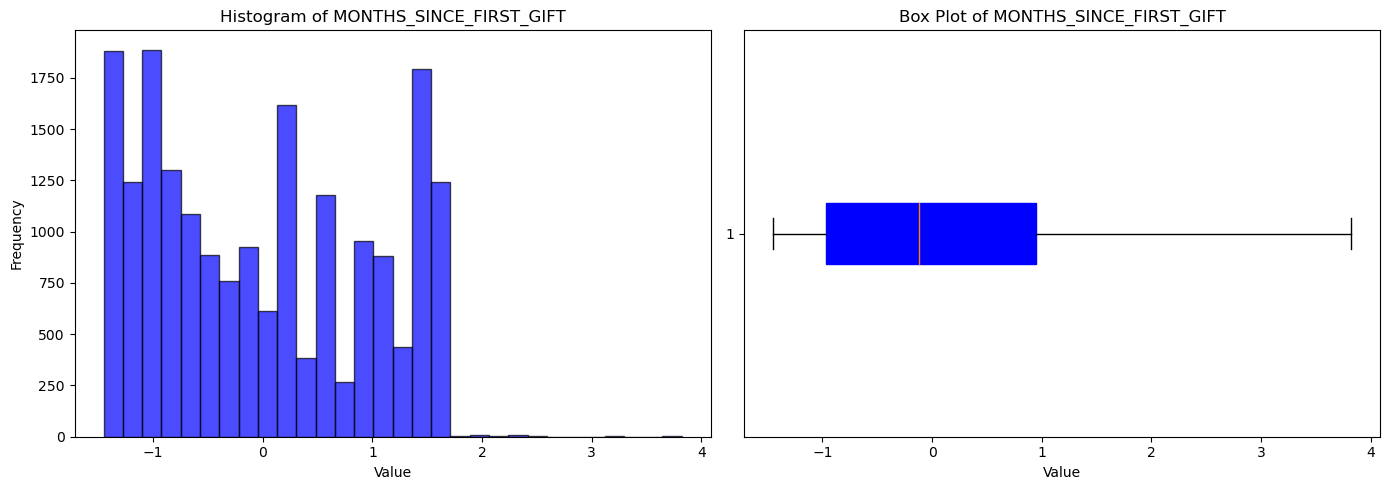

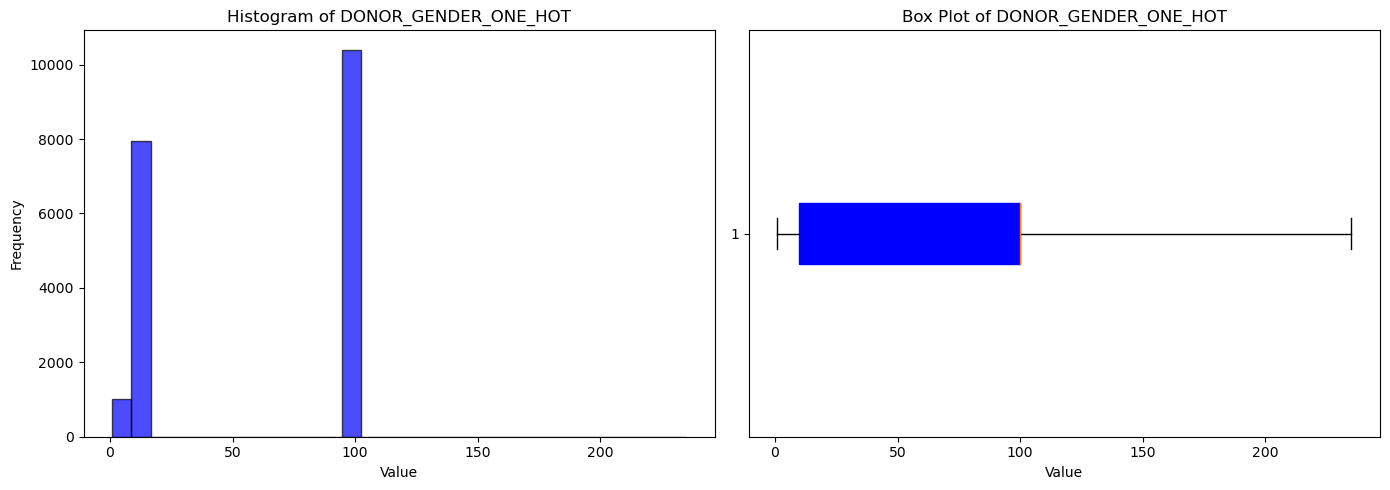

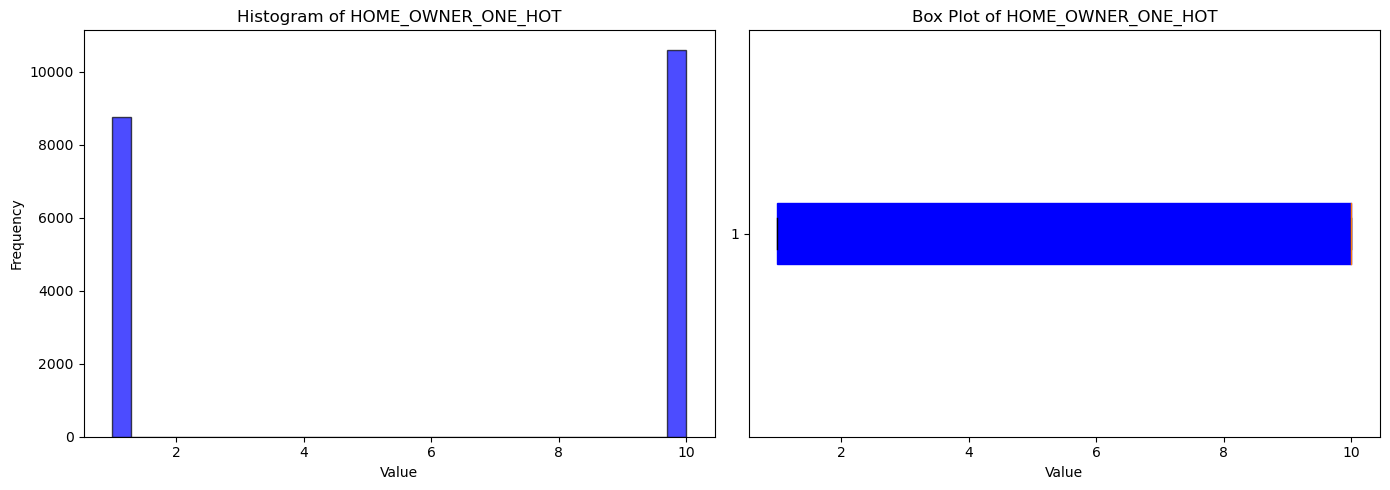

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Donor raw data.csv')  # Replace 'Donor raw data.csv' with the path to your dataset file

# Define the columns with outliers
columns_with_outliers = ['DONOR_AGE', 'IN_HOUSE', 'MOR_HIT_RATE', 'MEDIAN_HOUSEHOLD_INCOME', 
                         'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'RECENT_AVG_GIFT_AMT', 
                         'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 
                         'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 
                         'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 
                         'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 
                         'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'DONOR_GENDER_ONE_HOT', 'HOME_OWNER_ONE_HOT']

# Plot histograms and box plots for each column with outliers
for column in columns_with_outliers:
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axs[0].hist(data[column].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
    axs[0].set_title(f"Histogram of {column}")
    axs[0].set_xlabel("Value")
    axs[0].set_ylabel("Frequency")
    
    # Box plot
    axs[1].boxplot(data[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='blue'))
    axs[1].set_title(f"Box Plot of {column}")
    axs[1].set_xlabel("Value")
    
    plt.tight_layout()
    plt.show()


In [52]:
# Save the updated DataFrame to a new CSV file
saved_data.to_csv('Donor raw data.csv', index=False)
data

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,...,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,URBANICITY_encoded,OVERLAY_SOURCE_encoded,DONOR_GENDER_ONE_HOT,HOME_OWNER_ONE_HOT
0,-1.729225,0.668776,1.942050e+00,-0.281033,-1.163292,-0.995468,-0.353738,4.272647e-16,-0.292139,0.290229,...,-0.329280,-0.132267,-0.290410,-0.194287,1.936257,0.599404,0,2,10.0,10.0
1,-1.729099,1.541408,1.388778e+00,-0.281033,1.885897,-0.995468,-0.353738,-9.647106e-01,-0.791519,0.105986,...,-0.329280,0.034716,1.291654,0.667420,-2.031052,1.397973,1,2,10.0,10.0
2,-1.728651,0.959653,1.112142e+00,-0.281033,0.666221,-0.995468,-0.353738,1.921633e+00,0.383851,-0.308561,...,-0.329280,0.201699,1.687169,0.667420,-2.031052,0.945450,3,2,100.0,10.0
3,-1.728633,0.450618,4.914041e-16,-0.281033,1.276059,1.004553,-0.353738,-4.836534e-01,-1.150829,-2.174021,...,-0.580550,-0.132267,1.687169,0.667420,-2.031052,0.599404,5,3,100.0,10.0
4,-1.728580,0.668776,1.042983e+00,-0.281033,-1.163292,1.004553,0.435467,-2.596124e-03,-0.085079,0.935079,...,-0.329280,0.702649,0.500622,0.667420,-0.047397,0.599404,1,3,100.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,1.704140,0.377899,4.897112e-01,-0.281033,0.056384,1.004553,0.435467,9.595184e-01,0.420392,-0.769168,...,-0.580550,-0.132267,0.500622,0.021140,-0.047397,0.306595,5,3,100.0,10.0
19368,1.704552,1.541408,1.250460e+00,-0.281033,0.666221,1.004553,0.435467,9.595184e-01,0.280321,-0.124318,...,-0.831819,-0.549725,0.500622,0.021140,0.696473,1.610924,4,3,100.0,10.0
19369,1.705197,-1.076488,4.914041e-16,-0.281033,-1.773130,1.004553,-0.353738,4.272647e-16,-0.846329,0.198107,...,0.927067,-0.132267,-1.476957,-0.840566,1.192386,-1.237305,3,2,10.0,1.0
19370,1.705716,1.347490,1.319619e+00,-0.281033,1.276059,1.004553,-0.353738,1.921633e+00,0.481292,0.658715,...,-0.329280,0.702649,1.291654,0.667420,-2.031052,1.584305,0,3,10.0,1.0


In [53]:
# Load the TARGET_B data from the CSV file
target_data = pd.read_csv('C:\\Users\\TITILAYO\\Downloads\\TARGET_B.csv')
target_data

,TARGET_B
0,0
1,1
2,0
3,0
4,0
...,...
2142,0
2143,0
2144,0
2145,1


In [54]:
# Save the updated DataFrame to the existing CSV file
saved_data.to_csv('Donor raw data.csv', index=False)
data

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,...,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,URBANICITY_encoded,OVERLAY_SOURCE_encoded,DONOR_GENDER_ONE_HOT,HOME_OWNER_ONE_HOT
0,-1.729225,0.668776,1.942050e+00,-0.281033,-1.163292,-0.995468,-0.353738,4.272647e-16,-0.292139,0.290229,...,-0.329280,-0.132267,-0.290410,-0.194287,1.936257,0.599404,0,2,10.0,10.0
1,-1.729099,1.541408,1.388778e+00,-0.281033,1.885897,-0.995468,-0.353738,-9.647106e-01,-0.791519,0.105986,...,-0.329280,0.034716,1.291654,0.667420,-2.031052,1.397973,1,2,10.0,10.0
2,-1.728651,0.959653,1.112142e+00,-0.281033,0.666221,-0.995468,-0.353738,1.921633e+00,0.383851,-0.308561,...,-0.329280,0.201699,1.687169,0.667420,-2.031052,0.945450,3,2,100.0,10.0
3,-1.728633,0.450618,4.914041e-16,-0.281033,1.276059,1.004553,-0.353738,-4.836534e-01,-1.150829,-2.174021,...,-0.580550,-0.132267,1.687169,0.667420,-2.031052,0.599404,5,3,100.0,10.0
4,-1.728580,0.668776,1.042983e+00,-0.281033,-1.163292,1.004553,0.435467,-2.596124e-03,-0.085079,0.935079,...,-0.329280,0.702649,0.500622,0.667420,-0.047397,0.599404,1,3,100.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,1.704140,0.377899,4.897112e-01,-0.281033,0.056384,1.004553,0.435467,9.595184e-01,0.420392,-0.769168,...,-0.580550,-0.132267,0.500622,0.021140,-0.047397,0.306595,5,3,100.0,10.0
19368,1.704552,1.541408,1.250460e+00,-0.281033,0.666221,1.004553,0.435467,9.595184e-01,0.280321,-0.124318,...,-0.831819,-0.549725,0.500622,0.021140,0.696473,1.610924,4,3,100.0,10.0
19369,1.705197,-1.076488,4.914041e-16,-0.281033,-1.773130,1.004553,-0.353738,4.272647e-16,-0.846329,0.198107,...,0.927067,-0.132267,-1.476957,-0.840566,1.192386,-1.237305,3,2,10.0,1.0
19370,1.705716,1.347490,1.319619e+00,-0.281033,1.276059,1.004553,-0.353738,1.921633e+00,0.481292,0.658715,...,-0.329280,0.702649,1.291654,0.667420,-2.031052,1.584305,0,3,10.0,1.0


In [58]:
# Add the TARGET_B column to the existing DataFrame
data['TARGET_B'] = target_data['TARGET_B']

# Save the updated DataFrame back to the CSV file
data.to_csv('Donor raw data.csv', index=False)

In [59]:
# Save the updated DataFrame back to the CSV file
data.to_csv('Donor raw data.csv', index=False)

print(data.columns)

In [60]:
# Save the updated DataFrame back to the CSV file
data.to_csv('Donor raw data.csv', index=False)
data

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,...,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,URBANICITY_encoded,OVERLAY_SOURCE_encoded,DONOR_GENDER_ONE_HOT,HOME_OWNER_ONE_HOT,TARGET_B
0,-1.729225,0.668776,1.942050e+00,-0.281033,-1.163292,-0.995468,-0.353738,4.272647e-16,-0.292139,0.290229,...,-0.132267,-0.290410,-0.194287,1.936257,0.599404,0,2,10.0,10.0,0.0
1,-1.729099,1.541408,1.388778e+00,-0.281033,1.885897,-0.995468,-0.353738,-9.647106e-01,-0.791519,0.105986,...,0.034716,1.291654,0.667420,-2.031052,1.397973,1,2,10.0,10.0,1.0
2,-1.728651,0.959653,1.112142e+00,-0.281033,0.666221,-0.995468,-0.353738,1.921633e+00,0.383851,-0.308561,...,0.201699,1.687169,0.667420,-2.031052,0.945450,3,2,100.0,10.0,0.0
3,-1.728633,0.450618,4.914041e-16,-0.281033,1.276059,1.004553,-0.353738,-4.836534e-01,-1.150829,-2.174021,...,-0.132267,1.687169,0.667420,-2.031052,0.599404,5,3,100.0,10.0,0.0
4,-1.728580,0.668776,1.042983e+00,-0.281033,-1.163292,1.004553,0.435467,-2.596124e-03,-0.085079,0.935079,...,0.702649,0.500622,0.667420,-0.047397,0.599404,1,3,100.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,1.704140,0.377899,4.897112e-01,-0.281033,0.056384,1.004553,0.435467,9.595184e-01,0.420392,-0.769168,...,-0.132267,0.500622,0.021140,-0.047397,0.306595,5,3,100.0,10.0,NaN
19368,1.704552,1.541408,1.250460e+00,-0.281033,0.666221,1.004553,0.435467,9.595184e-01,0.280321,-0.124318,...,-0.549725,0.500622,0.021140,0.696473,1.610924,4,3,100.0,10.0,NaN
19369,1.705197,-1.076488,4.914041e-16,-0.281033,-1.773130,1.004553,-0.353738,4.272647e-16,-0.846329,0.198107,...,-0.132267,-1.476957,-0.840566,1.192386,-1.237305,3,2,10.0,1.0,NaN
19370,1.705716,1.347490,1.319619e+00,-0.281033,1.276059,1.004553,-0.353738,1.921633e+00,0.481292,0.658715,...,0.702649,1.291654,0.667420,-2.031052,1.584305,0,3,10.0,1.0,NaN


In [61]:
import pandas as pd

# Read the saved data CSV file
saved_data = pd.read_csv('Donor raw data.csv')

# Strip spaces from the column names
saved_data.columns = saved_data.columns.str.strip()

# Fill NaN values in 'TARGET_B' column with 0
saved_data['TARGET_B'].fillna(0, inplace=True)

# Define a function to remove outliers based on the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'TARGET_B' column
saved_data_no_outliers = remove_outliers(saved_data, 'TARGET_B')

# Update the original DataFrame with the cleaned 'TARGET_B' values
saved_data['TARGET_B'] = saved_data_no_outliers['TARGET_B']

# Save the updated DataFrame back to the CSV file
saved_data.to_csv('Donor raw data.csv', index=False)

# Print the updated DataFrame to verify
print(saved_data)


       CONTROL_NUMBER  MONTHS_SINCE_ORIGIN     DONOR_AGE  IN_HOUSE  \
0           -1.729225             0.668776  1.942050e+00 -0.281033   
1           -1.729099             1.541408  1.388778e+00 -0.281033   
2           -1.728651             0.959653  1.112142e+00 -0.281033   
3           -1.728633             0.450618  4.914041e-16 -0.281033   
4           -1.728580             0.668776  1.042983e+00 -0.281033   
...               ...                  ...           ...       ...   
19367        1.704140             0.377899  4.897112e-01 -0.281033   
19368        1.704552             1.541408  1.250460e+00 -0.281033   
19369        1.705197            -1.076488  4.914041e-16 -0.281033   
19370        1.705716             1.347490  1.319619e+00 -0.281033   
19371        1.705788            -1.076488  7.663471e-01 -0.281033   

       INCOME_GROUP  PUBLISHED_PHONE  MOR_HIT_RATE  WEALTH_RATING  \
0         -1.163292        -0.995468     -0.353738   4.272647e-16   
1          1.885897  

In [68]:
# Fill NaN values in 'TARGET_B' column with 0
saved_data['TARGET_B'].fillna(0, inplace=True)

In [69]:
# Save the updated DataFrame back to the CSV file
data.to_csv('Donor raw data.csv', index=False)

In [75]:
import pandas as pd

# Read the saved data CSV file
saved_data = pd.read_csv('Donor raw data.csv')

# Strip spaces from the column names
saved_data.columns = saved_data.columns.str.strip()

# Fill NaN values in 'TARGET_B' column with 0
saved_data['TARGET_B'].fillna(0, inplace=True)

# Save the updated DataFrame back to the CSV file
saved_data.to_csv('Donor raw data.csv', index=False)

# Print the updated DataFrame to verify
print(saved_data)


       CONTROL_NUMBER  MONTHS_SINCE_ORIGIN     DONOR_AGE  IN_HOUSE  \
0           -1.729225             0.668776  1.942050e+00 -0.281033   
1           -1.729099             1.541408  1.388778e+00 -0.281033   
2           -1.728651             0.959653  1.112142e+00 -0.281033   
3           -1.728633             0.450618  4.914041e-16 -0.281033   
4           -1.728580             0.668776  1.042983e+00 -0.281033   
...               ...                  ...           ...       ...   
19367        1.704140             0.377899  4.897112e-01 -0.281033   
19368        1.704552             1.541408  1.250460e+00 -0.281033   
19369        1.705197            -1.076488  4.914041e-16 -0.281033   
19370        1.705716             1.347490  1.319619e+00 -0.281033   
19371        1.705788            -1.076488  7.663471e-01 -0.281033   

       INCOME_GROUP  PUBLISHED_PHONE  MOR_HIT_RATE  WEALTH_RATING  \
0         -1.163292        -0.995468     -0.353738   4.272647e-16   
1          1.885897  

Fit The regression Tree Model

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# Load the DataFrame from the CSV file
data = pd.read_csv('Donor raw data.csv')

In [77]:
# Select features and target variable
features = data.drop(columns=['TARGET_B'])  # replace 'target_column' with your actual target column name
target = data['TARGET_B']

In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [79]:
# Initialize the model
model = DecisionTreeClassifier(random_state=42)

In [80]:
# Fitting a decision tree regression model
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
# Assuming 'X_train' and 'y_train' are your training features and labels
# Train your Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Specify the path where you want to save the Decision Tree model pickle file
decision_tree_model_file_path = 'decision_tree_model.pkl'

# Save the Decision Tree model to a pickle file
with open(decision_tree_model_file_path, 'wb') as file:
    pickle.dump(decision_tree_model, file)

In [82]:
prediction = model.predict(X_test)

In [83]:
prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [84]:
classification_report(prediction, y_test)

'              precision    recall  f1-score   support\n\n         0.0       0.98      0.98      0.98      3753\n         1.0       0.35      0.32      0.33       122\n\n    accuracy                           0.96      3875\n   macro avg       0.66      0.65      0.66      3875\nweighted avg       0.96      0.96      0.96      3875\n'

In [85]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3753
         1.0       0.35      0.32      0.33       122

    accuracy                           0.96      3875
   macro avg       0.66      0.65      0.66      3875
weighted avg       0.96      0.96      0.96      3875



In [86]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
svm_model = SVC()

In [87]:
# Train the SVM classifier on the training data
svm_model.fit(X_train, y_train)

SVC()

In [88]:
# Specify the path where you want to save the SVM model pickle file
svm_model_file_path = 'svm_model.pkl'

# Save the SVM model to a pickle file
with open(svm_model_file_path, 'wb') as file:
    pickle.dump(svm_model, file)

In [89]:
# Predict the labels for the testing data
y_pred = svm_model.predict(X_test)

In [90]:
# Calculate the accuracy score of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model:", accuracy)

Accuracy of SVM model: 0.9713548387096774


In [91]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3753
         1.0       0.35      0.32      0.33       122

    accuracy                           0.96      3875
   macro avg       0.66      0.65      0.66      3875
weighted avg       0.96      0.96      0.96      3875



SVM model achieved an accuracy of approximately 97.14%

Recommendation:

Given the accuracy and performance metrics, I would recommend using the SVM model over the decision tree model for predicting donations.
However, it's essential to consider other factors such as the cost of misclassification (false positives vs. false negatives) and the specific goals of the charity organization.
Additionally, continuous monitoring and updating of the model with new data can further improve its performance over time.
It's also important to communicate to your client that while the model can provide insights and predictions, it should not be the sole determinant for decision-making. Human judgment and domain expertise should still play a significant role in guiding the organization's actions.